# Comportamiento de contagios de COVID-19 en México en toda la población registrada

Se importan librerías necesarias para trabajar con dataframes y graficar.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'

In [4]:
# Tamaño de la letra fuente de los labels x e y. Así como de las divisiones.
fontsize = 30
labelsize = 20
linewidth = 2

Esta información es obtenida directamente de los Datos Abiertos de la Dirección General de Epidemiología.
The information is obtained directly from the Datos Abiertos of Dirección General de Epidemiología: https://www.gob.mx/salud/documentos/datos-abiertos-152127
http://datosabiertos.salud.gob.mx/gobmx/salud/datos_abiertos/datos_abiertos_covid19.zip

In [5]:
covid19_df = pd.read_csv('210816COVID19MEXICO.csv')

/Users/sinue/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (38) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
print(covid19_df.head())
covid19_df.columns

  FECHA_ACTUALIZACION ID_REGISTRO  ORIGEN  SECTOR  ENTIDAD_UM  SEXO  \
0          2021-08-16      z482b8       2      12           9     2   
1          2021-08-16      z49a69       1      12          23     1   
2          2021-08-16      z23d9d       1      12          22     2   
3          2021-08-16      z24953       1      12           9     1   
4          2021-08-16      zz8e77       2      12           9     2   

   ENTIDAD_NAC  ENTIDAD_RES  MUNICIPIO_RES  TIPO_PACIENTE  ... OTRO_CASO  \
0            9            9             12              1  ...         2   
1           23           23              4              2  ...         1   
2           24           22              9              1  ...         2   
3            9            9             10              1  ...         1   
4            9            9              2              1  ...         2   

  TOMA_MUESTRA_LAB RESULTADO_LAB  TOMA_MUESTRA_ANTIGENO  RESULTADO_ANTIGENO  \
0                2            97     

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA_LAB', 'RESULTADO_LAB',
       'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO', 'CLASIFICACION_FINAL',
       'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'],
      dtype='object')

Se obtienen solo las columnas de interés

In [7]:
covid19_df_copy = covid19_df.copy()[['ID_REGISTRO','FECHA_INGRESO','FECHA_DEF','EDAD','DIABETES','OBESIDAD','TABAQUISMO']]

Se asigna un valor de 1 cuando la persona registrada no haya sido registrada como un deceso, si sigue viva es un 0

In [8]:
covid19_df_copy['DECESO'] = np.where(covid19_df_copy['FECHA_DEF'] != '9999-99-99', 1, 0)

Se agrega una columna de rango de edad, en intervalo de 10 años

In [9]:
covid19_df_copy['RANGO_EDAD'] = (covid19_df_copy['EDAD'] / 10).astype(int)*10

In [10]:
# Esta función convierte un identificador numérico en uno categórico de tipo string
# (aplica para Diabetes, Obesidad y Tabaquismo, de acuerdo al Glosario proporcionado 
# en la misma página mencionada arriba)
def numero_a_caso(x):
    switcher = {
        1:"Si",
        2:"No",
        97:"No aplica",
        98:"Se ignora",
        99:"No especificado"
    }
    return switcher.get(x, "Default")

In [11]:
covid19_df_copy['DIABETES'] = covid19_df_copy['DIABETES'].apply(numero_a_caso)
covid19_df_copy['OBESIDAD'] = covid19_df_copy['OBESIDAD'].apply(numero_a_caso)
covid19_df_copy['TABAQUISMO'] = covid19_df_copy['TABAQUISMO'].apply(numero_a_caso)

In [12]:
covid19_df_copy.info()
covid19_df_copy.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9113592 entries, 0 to 9113591
Data columns (total 9 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   ID_REGISTRO    object
 1   FECHA_INGRESO  object
 2   FECHA_DEF      object
 3   EDAD           int64 
 4   DIABETES       object
 5   OBESIDAD       object
 6   TABAQUISMO     object
 7   DECESO         int64 
 8   RANGO_EDAD     int64 
dtypes: int64(3), object(6)
memory usage: 625.8+ MB


ID_REGISTRO      0
FECHA_INGRESO    0
FECHA_DEF        0
EDAD             0
DIABETES         0
OBESIDAD         0
TABAQUISMO       0
DECESO           0
RANGO_EDAD       0
dtype: int64

In [13]:
covid19_df_copy['FECHA_INGRESO'] = pd.to_datetime(covid19_df_copy['FECHA_INGRESO'], format='%Y-%m-%d')

In [14]:
covid19_df_copy = covid19_df_copy.sort_values(by=['FECHA_INGRESO'], ascending = True) 

In [15]:
covid19_df_copy.head()

ID_REGISTRO FECHA_INGRESO   FECHA_DEF  EDAD DIABETES OBESIDAD  \
218         033d67    2020-01-01  9999-99-99    44       No       Si   
219         040b7b    2020-01-01  9999-99-99    13       No       No   
529909      087db8    2020-01-01  9999-99-99     2       No       No   
216         19de46    2020-01-01  9999-99-99    29       No       No   
529999      0d4624    2020-01-01  2020-01-19    64       No       No   

       TABAQUISMO  DECESO  RANGO_EDAD  
218            No       0          40  
219            No       0          10  
529909         No       0           0  
216            No       0          20  
529999         No       1          60

In [16]:
# Esta función reinicia el dataframe final_covid19_df a su estado inicial
def restore_df():
    final_covid19_df = None
    final_covid19_df = covid19_df_copy.copy()
    final_covid19_df['CASO'] = 1

In [17]:
final_covid19_df = None
final_covid19_df = covid19_df_copy.copy()
final_covid19_df['CASO'] = 1

In [18]:
final_covid19_df.head()

ID_REGISTRO FECHA_INGRESO   FECHA_DEF  EDAD DIABETES OBESIDAD  \
218         033d67    2020-01-01  9999-99-99    44       No       Si   
219         040b7b    2020-01-01  9999-99-99    13       No       No   
529909      087db8    2020-01-01  9999-99-99     2       No       No   
216         19de46    2020-01-01  9999-99-99    29       No       No   
529999      0d4624    2020-01-01  2020-01-19    64       No       No   

       TABAQUISMO  DECESO  RANGO_EDAD  CASO  
218            No       0          40     1  
219            No       0          10     1  
529909         No       0           0     1  
216            No       0          20     1  
529999         No       1          60     1

## Vista general de casos de COVID-19 registrados por día

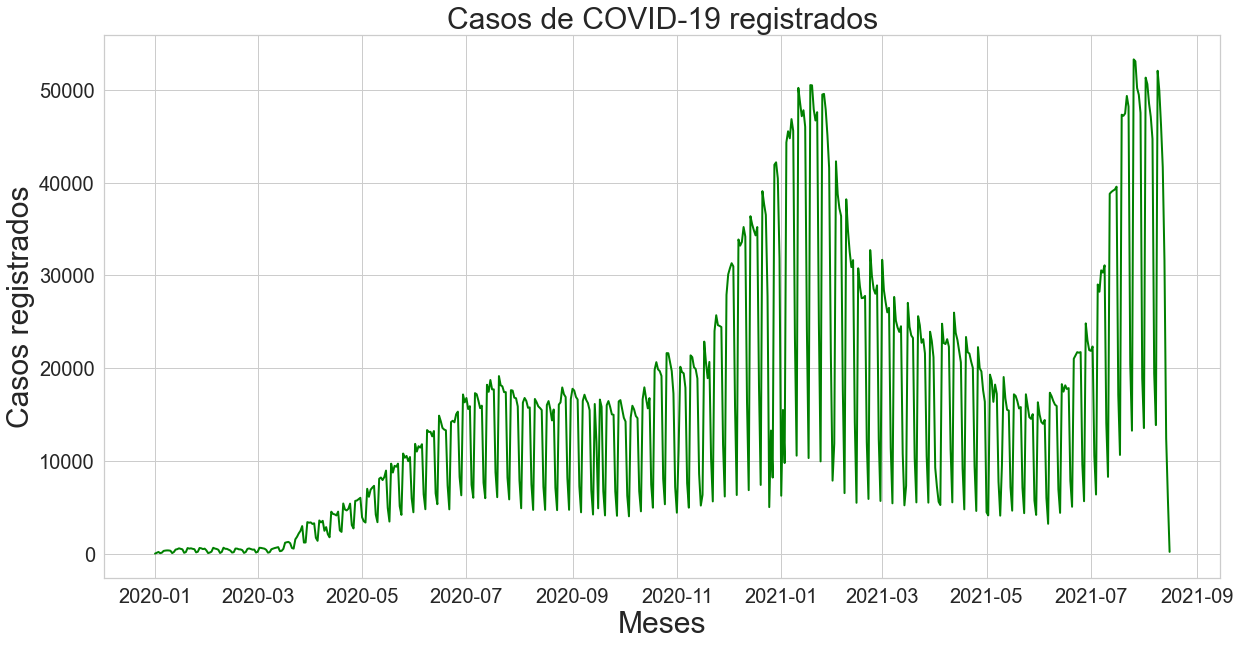

In [19]:
# final_covid19_df.groupby(["FECHA_INGRESO"]).sum().reset_index().plot(x='FECHA_INGRESO', y=['CASO'], figsize=(20,10))
# plt.title("Casos de Covid-19 registrados")
# plt.xlabel("Meses")
# plt.ylabel("Casos registrados")
# plt.show()
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
sns.lineplot(x='FECHA_INGRESO', 
      y='CASO',
      data=final_covid19_df.groupby(["FECHA_INGRESO"]).sum().reset_index(),
             color = "green",
            linewidth = linewidth)
plt.title("Casos de COVID-19 registrados", fontsize = fontsize)
plt.xlabel("Meses", fontsize = fontsize)
plt.ylabel("Casos registrados", fontsize = fontsize)
plt.tick_params(axis = 'x', labelsize=20)
plt.tick_params(axis = 'y', labelsize=20)

## Casos y decesos de COVID-19 en México

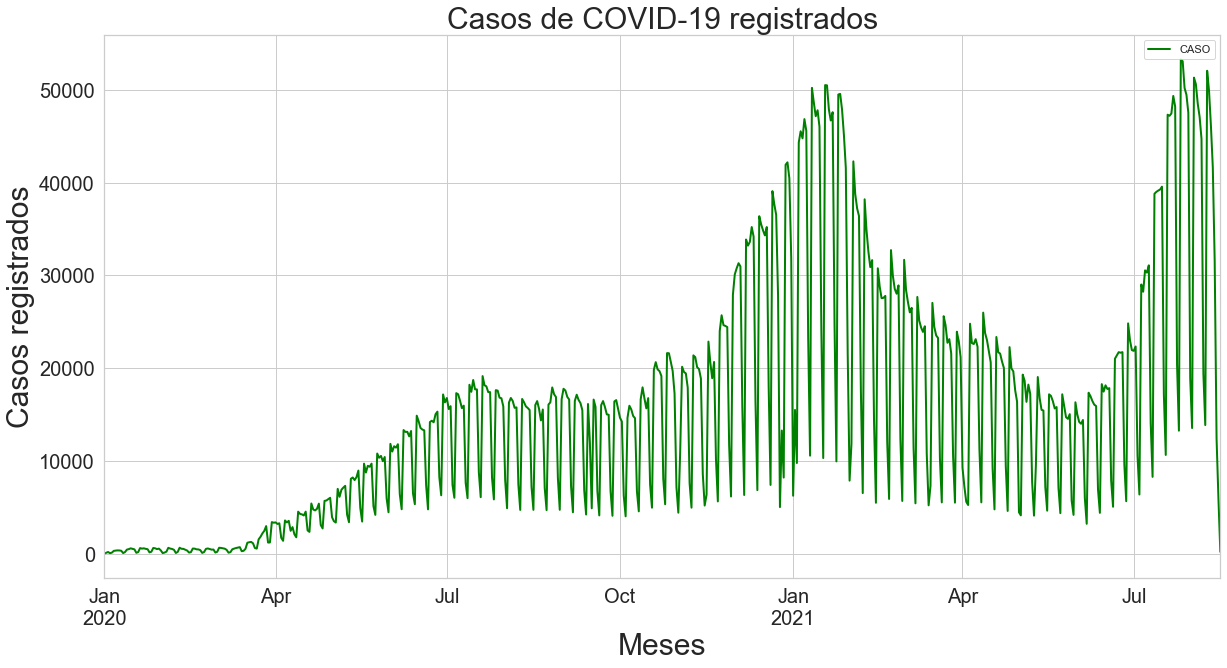

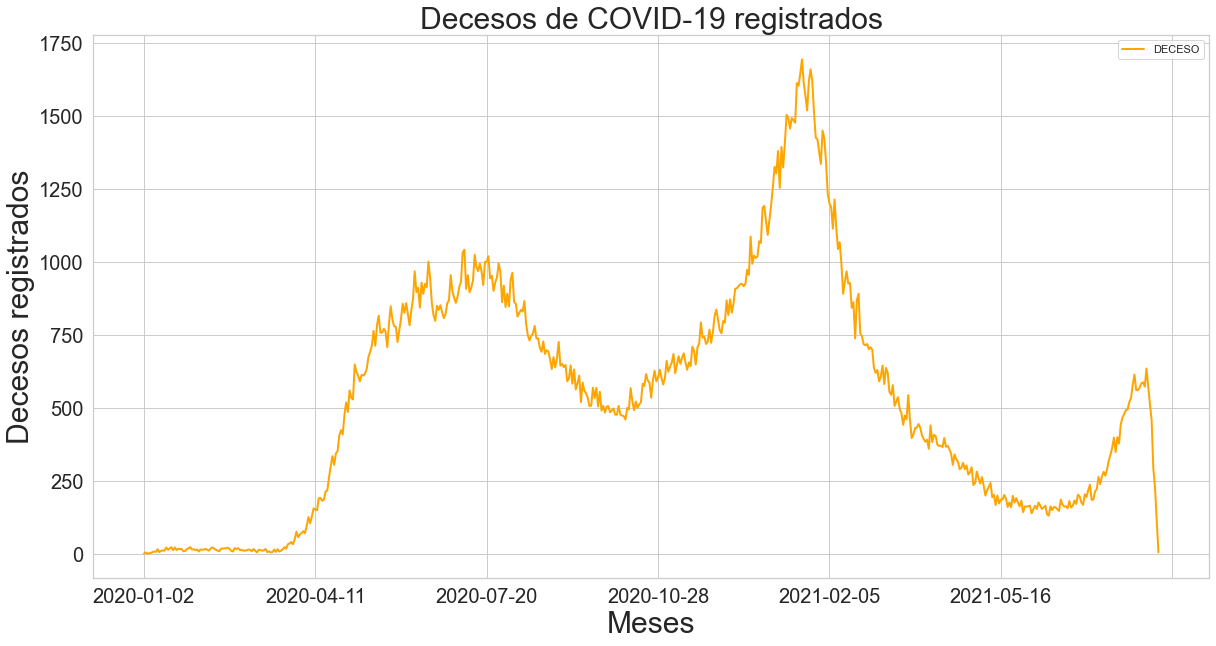

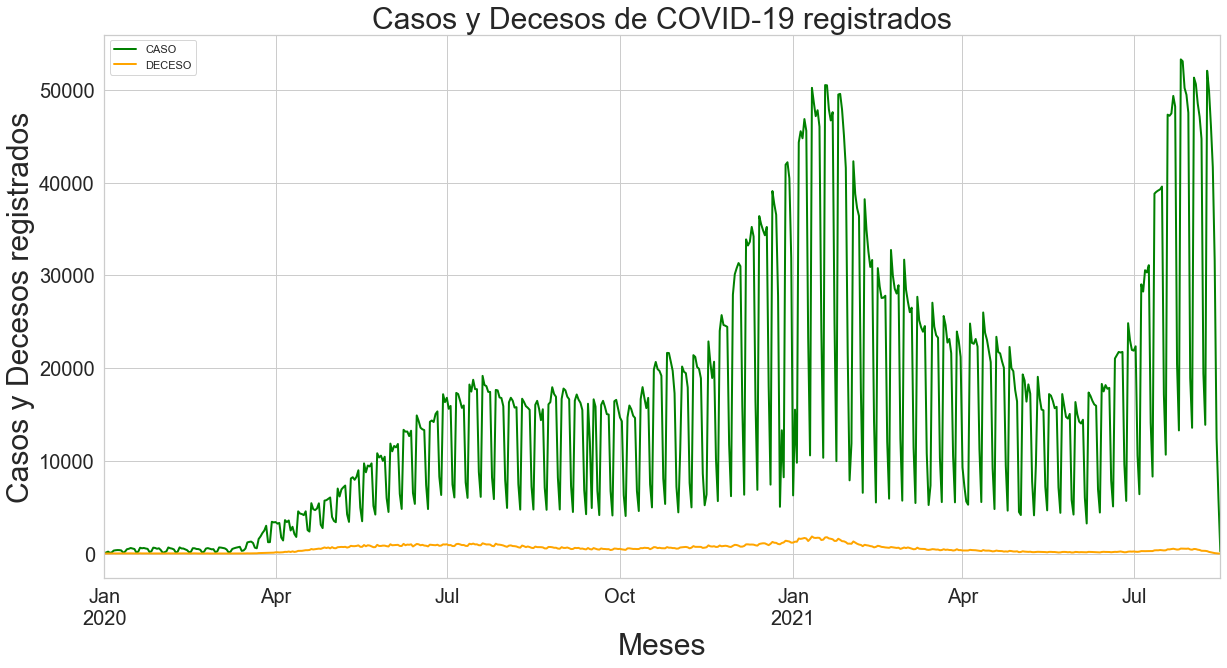

In [20]:
final_covid19_df.groupby(["FECHA_INGRESO"]).sum().reset_index().plot(
    x='FECHA_INGRESO', 
    y=['CASO'], 
    figsize=(20,10), 
    color='Green', 
    linewidth = linewidth)
plt.title("Casos de COVID-19 registrados", fontsize=fontsize)
plt.xlabel("Meses", fontsize=fontsize)
plt.ylabel("Casos registrados", fontsize=fontsize)
plt.tick_params(axis = 'x', labelsize=20)
plt.tick_params(axis = 'y', labelsize=20)

final_covid19_df[final_covid19_df['DECESO'] == True].groupby(["FECHA_DEF"]).sum().reset_index().plot(
    x='FECHA_DEF', 
    y=['DECESO'], 
    figsize=(20,10), 
    color='Orange',
    linewidth = linewidth)
plt.title("Decesos de COVID-19 registrados", fontsize=fontsize)
plt.xlabel("Meses", fontsize=fontsize)
plt.ylabel("Decesos registrados", fontsize=fontsize)
plt.tick_params(axis = 'x', labelsize=20)
plt.tick_params(axis = 'y', labelsize=20)

final_covid19_df.groupby(["FECHA_INGRESO"]).sum().reset_index().plot(
    x='FECHA_INGRESO', 
    y=['CASO', 'DECESO'], 
    color=['Green','Orange'], 
    figsize=(20,10),
    linewidth = linewidth)
plt.title("Casos y Decesos de COVID-19 registrados", fontsize=fontsize)
plt.xlabel("Meses", fontsize=fontsize)
plt.ylabel("Casos y Decesos registrados", fontsize=fontsize)
plt.tick_params(axis = 'x', labelsize=20)
plt.tick_params(axis = 'y', labelsize=20)


Se agrupan los casos conforme a la fecha de ingreso

In [21]:
final_covid19_df = final_covid19_df.groupby(['FECHA_INGRESO']).sum().reset_index()
final_covid19_df.head()

FECHA_INGRESO  EDAD  DECESO  RANGO_EDAD  CASO
0    2020-01-01  1623       7        1450    37
1    2020-01-02  4210       7        3670   129
2    2020-01-03  7261      12        6350   211
3    2020-01-04  2698       4        2390    80
4    2020-01-05  5470      13        4900   138

## Aceleración de Casos y Decesos por día

Esto ayuda a entender qué tan rápido aumentan o disminuyen los casos. Si la aceleración es negativa, 
quiere decir que el número de casos ha disminuido de un día a otro, caso contrario significa que ha 
aumentado de un día a otro.

In [22]:
# Esta función calcula la aceleración de casos y decesos por día, en general
def calcular_aceleracion():
    final_covid19_df['ACELERACION_CASOS_DIA'] = final_covid19_df['CASO']
    final_covid19_df['ACELERACION_DECESOS_DIA'] = final_covid19_df['DECESO']
    final_covid19_df['ACELERACION_CASOS_DIA'][0] = final_covid19_df['CASO'][0]
    final_covid19_df['ACELERACION_DECESOS_DIA'][0] = final_covid19_df['DECESO'][0]

    for index, _ in enumerate(final_covid19_df['CASO'][1:]):
        final_covid19_df['ACELERACION_CASOS_DIA'][index+1] = final_covid19_df['CASO'][index+1] - final_covid19_df['CASO'][index]
        final_covid19_df['ACELERACION_DECESOS_DIA'][index+1] = final_covid19_df['DECESO'][index+1] - final_covid19_df['DECESO'][index]
        

In [23]:
calcular_aceleracion()

## Se grafican las aceleraciones de Casos y Decesos por día.

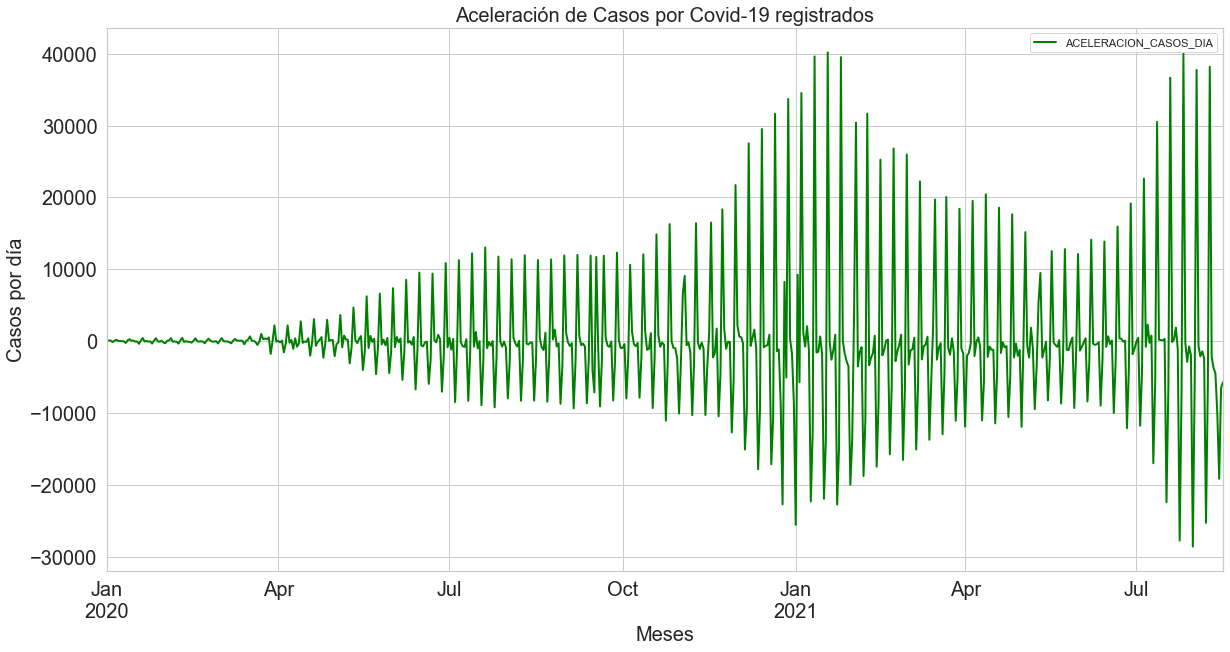

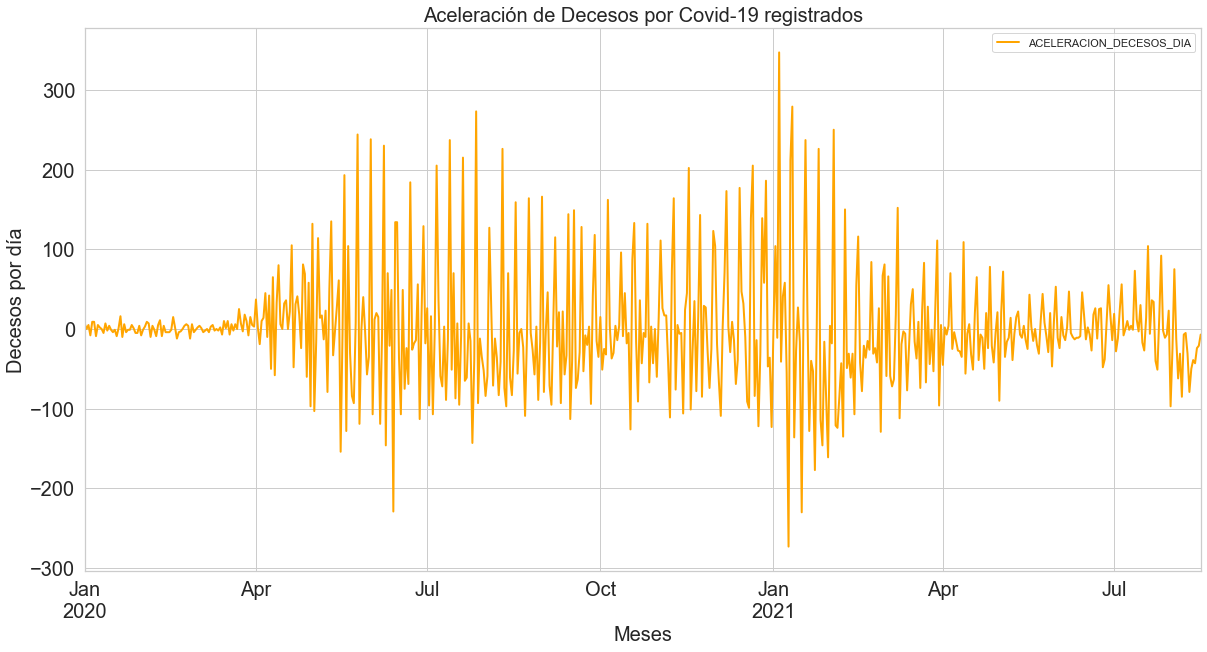

In [24]:
final_covid19_df.groupby(["FECHA_INGRESO"]).sum().reset_index().plot(
    x='FECHA_INGRESO', 
    y='ACELERACION_CASOS_DIA', 
    figsize=(20,10), 
    color="Green",
    linewidth = linewidth)
plt.title("Aceleración de Casos por Covid-19 registrados", fontsize = 20)
plt.xlabel("Meses", fontsize = 20)
plt.ylabel("Casos por día", fontsize = 20)
plt.tick_params(axis = 'x', labelsize=20)
plt.tick_params(axis = 'y', labelsize=20)

final_covid19_df.groupby(["FECHA_INGRESO"]).sum().reset_index().plot(
    x='FECHA_INGRESO', 
    y='ACELERACION_DECESOS_DIA', 
    figsize=(20,10), 
    color="Orange",
    linewidth = linewidth)
plt.title("Aceleración de Decesos por Covid-19 registrados", fontsize = 20)
plt.xlabel("Meses", fontsize = 20)
plt.ylabel("Decesos por día", fontsize = 20)
plt.tick_params(axis = 'x', labelsize=20)
plt.tick_params(axis = 'y', labelsize=20)


In [25]:
# restore_df()

In [26]:
final_covid19_df = None
final_covid19_df = covid19_df_copy.copy()
final_covid19_df['CASO'] = 1

In [27]:
final_covid19_df = final_covid19_df.groupby(['FECHA_INGRESO','RANGO_EDAD'], as_index=False)

In [28]:
final_covid19_df.head()

ID_REGISTRO FECHA_INGRESO   FECHA_DEF  EDAD DIABETES OBESIDAD  \
218         033d67    2020-01-01  9999-99-99    44       No       Si   
219         040b7b    2020-01-01  9999-99-99    13       No       No   
529909      087db8    2020-01-01  9999-99-99     2       No       No   
216         19de46    2020-01-01  9999-99-99    29       No       No   
529999      0d4624    2020-01-01  2020-01-19    64       No       No   
...            ...           ...         ...   ...      ...      ...   
850399      9521bb    2021-08-16  9999-99-99     3       No       No   
850375      a73740    2021-08-16  9999-99-99    84       No       No   
850605      a373cf    2021-08-16  9999-99-99    85       Si       No   
850381      c1af5f    2021-08-16  9999-99-99    93       No       No   
850470      6f17d3    2021-08-16  9999-99-99     0       No       No   

       TABAQUISMO  DECESO  RANGO_EDAD  CASO  
218            No       0          40     1  
219            No       0          10     1  
529909         No       0           0     1  
216            No       0          20     1  
529999         No       1          60     1  
...           ...     ...         ...   ...  
850399         No       0           0     1  
850375         No       0          80     1  
850605         No       0          80     1  
850381         No       0          90     1  
850470         No       0           0     1  

[31237 rows x 10 columns]

Se calcula la tasa de Decesos sobre número de Casos por día. 
Esto da una idea de la tasa de mortalidad, es decir cuántas personas mueren por cada contagio

In [29]:
type(final_covid19_df)

pandas.core.groupby.generic.DataFrameGroupBy

In [30]:
final_covid19_df_tasa = pd.DataFrame(final_covid19_df.sum().reset_index())

In [31]:
final_covid19_df_tasa.head()

index FECHA_INGRESO  RANGO_EDAD  EDAD  DECESO  CASO
0      0    2020-01-01           0    15       1     5
1      1    2020-01-01          10    36       0     3
2      2    2020-01-01          20    81       0     3
3      3    2020-01-01          30   176       0     5
4      4    2020-01-01          40   138       1     3

In [32]:
final_covid19_df_tasa['TASA_DECESOS_CASOS'] = final_covid19_df_tasa['DECESO'] / final_covid19_df_tasa['CASO'] * 100

In [33]:
final_covid19_df_tasa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6646 entries, 0 to 6645
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               6646 non-null   int64         
 1   FECHA_INGRESO       6646 non-null   datetime64[ns]
 2   RANGO_EDAD          6646 non-null   int64         
 3   EDAD                6646 non-null   int64         
 4   DECESO              6646 non-null   int64         
 5   CASO                6646 non-null   int64         
 6   TASA_DECESOS_CASOS  6646 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 363.6 KB


In [34]:
final_covid19_df_tasa = final_covid19_df_tasa.groupby('RANGO_EDAD', as_index=False)

In [35]:
final_covid19_df_tasa.head()

index FECHA_INGRESO  RANGO_EDAD  EDAD  DECESO  CASO  TASA_DECESOS_CASOS
0         0    2020-01-01           0    15       1     5           20.000000
1         1    2020-01-01          10    36       0     3            0.000000
2         2    2020-01-01          20    81       0     3            0.000000
3         3    2020-01-01          30   176       0     5            0.000000
4         4    2020-01-01          40   138       1     3           33.333333
...     ...           ...         ...   ...     ...   ...                 ...
1449   1449    2020-05-20         120   120       0     1            0.000000
1690   1690    2020-06-11         120   120       0     1            0.000000
1910   1910    2020-07-01         120   120       0     1            0.000000
2055   2055    2020-07-14         120   120       0     1            0.000000
2235   2235    2020-07-30         120   240       0     2            0.000000

[65 rows x 7 columns]

Finalmente se grafican los Casos, Decesos y tasa de Decesos/Casos en grupos de 10 años

/Users/sinue/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


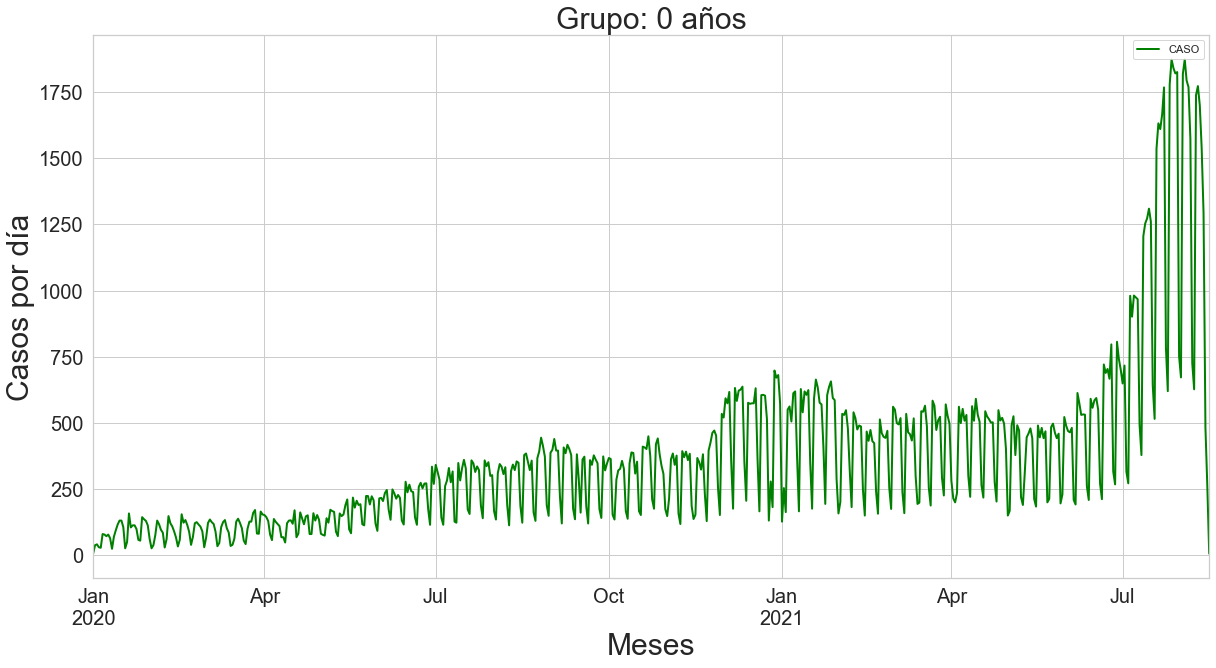

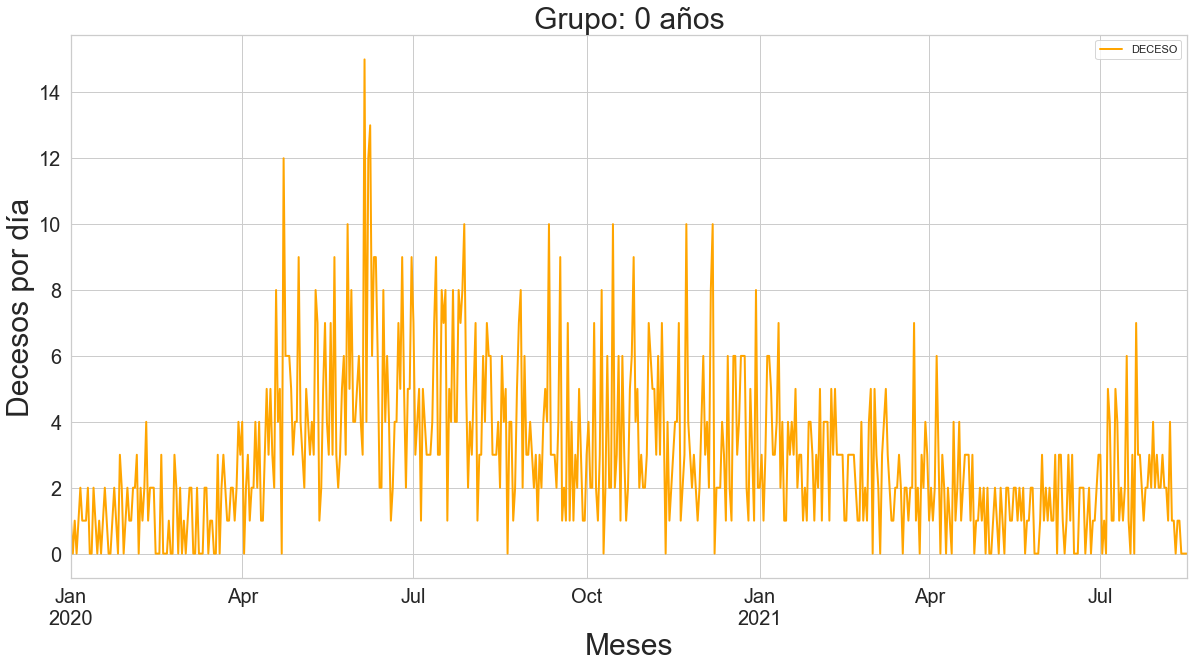

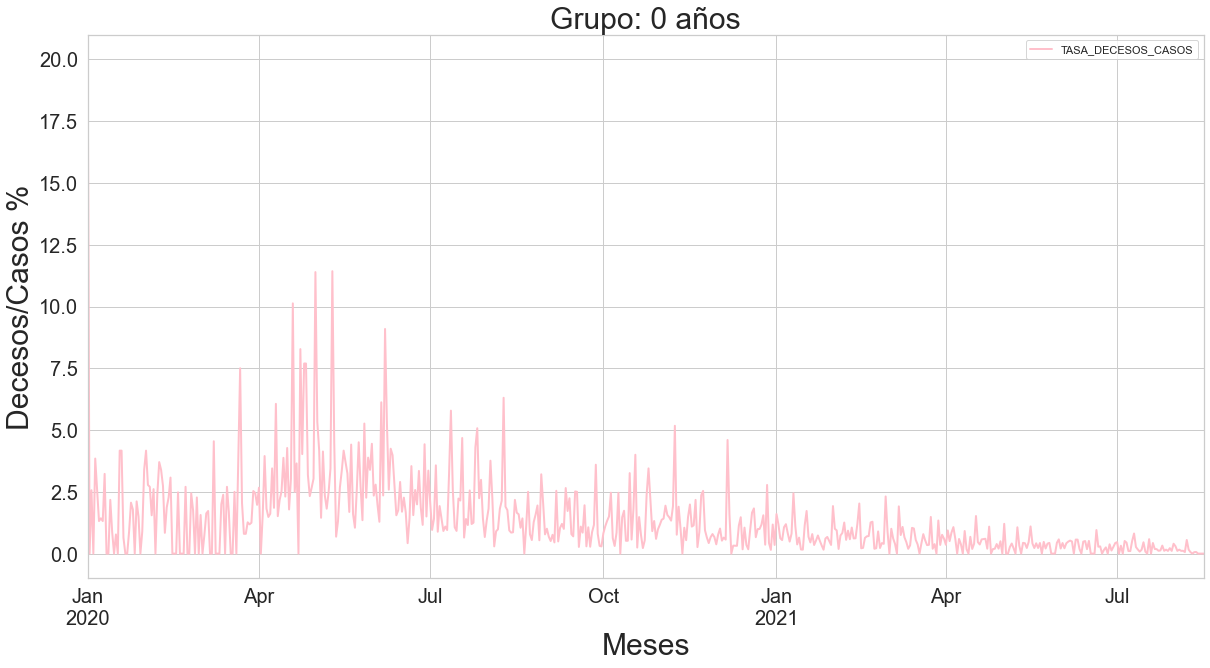

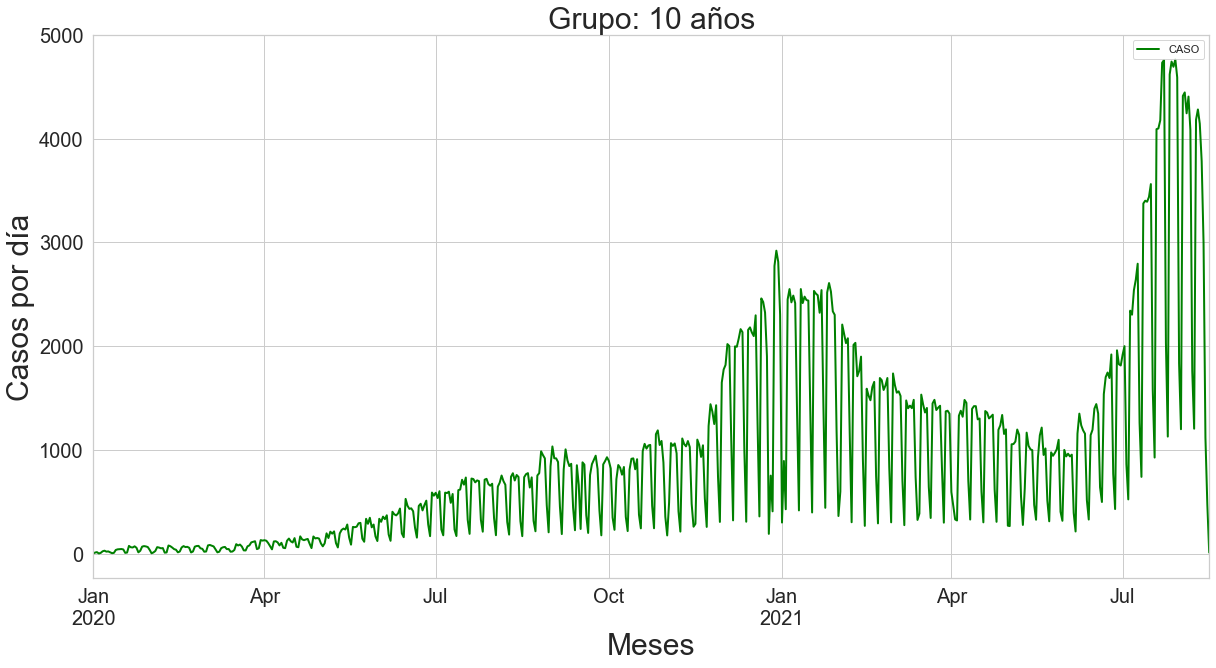

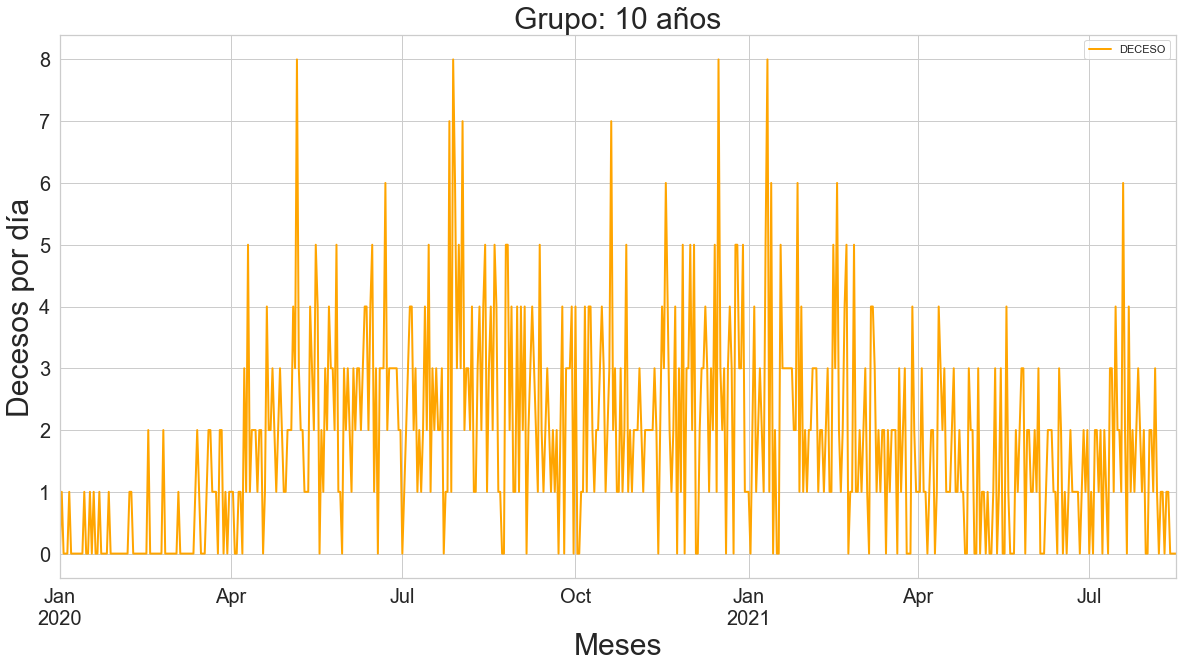

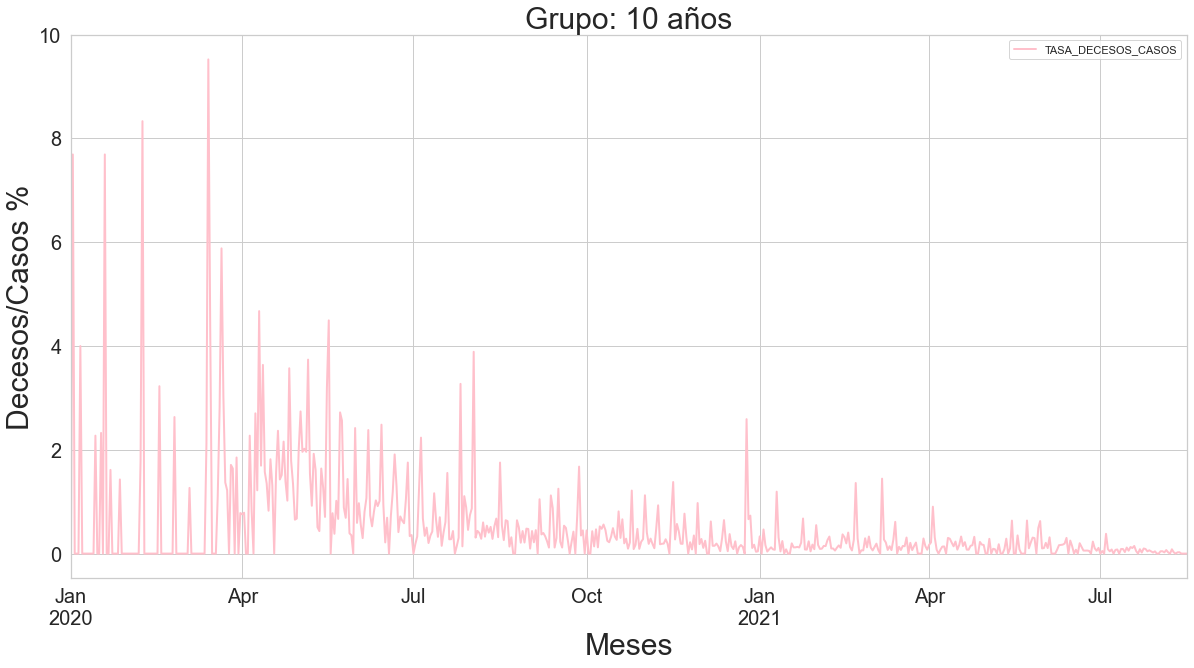

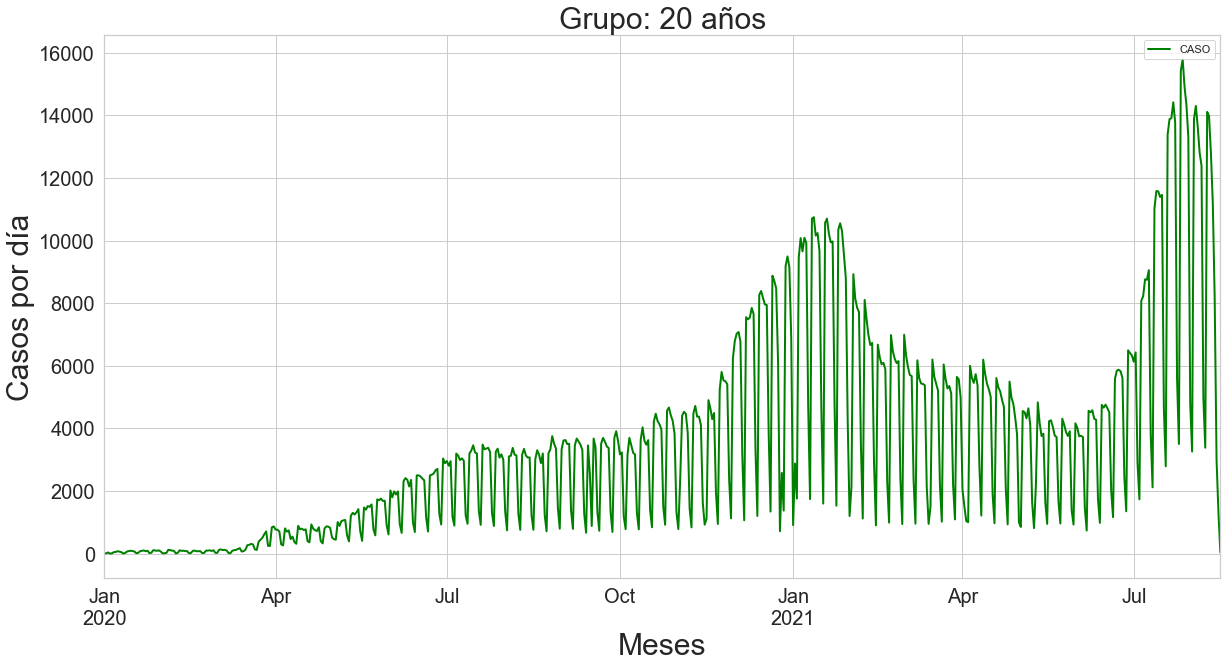

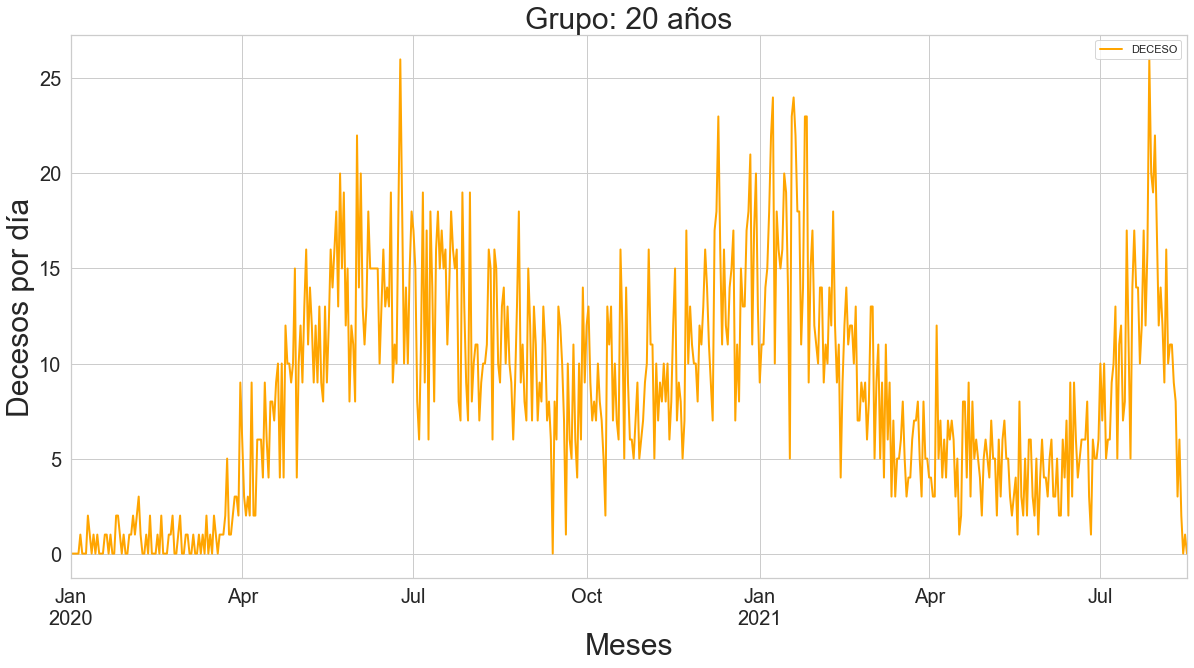

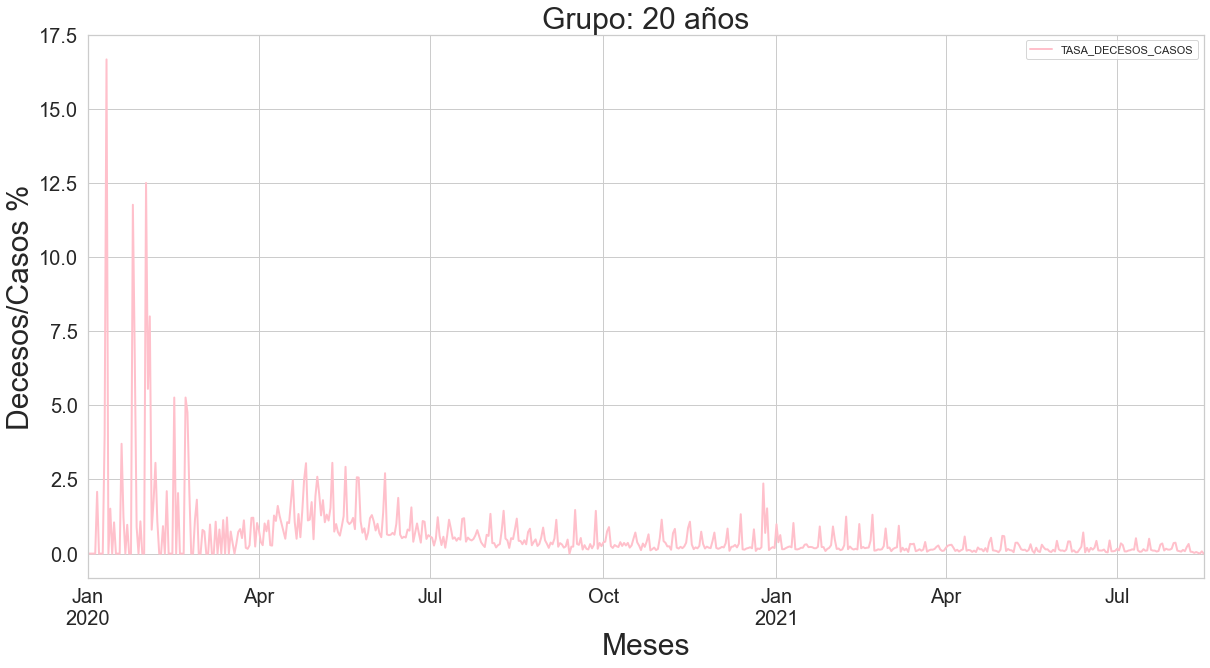

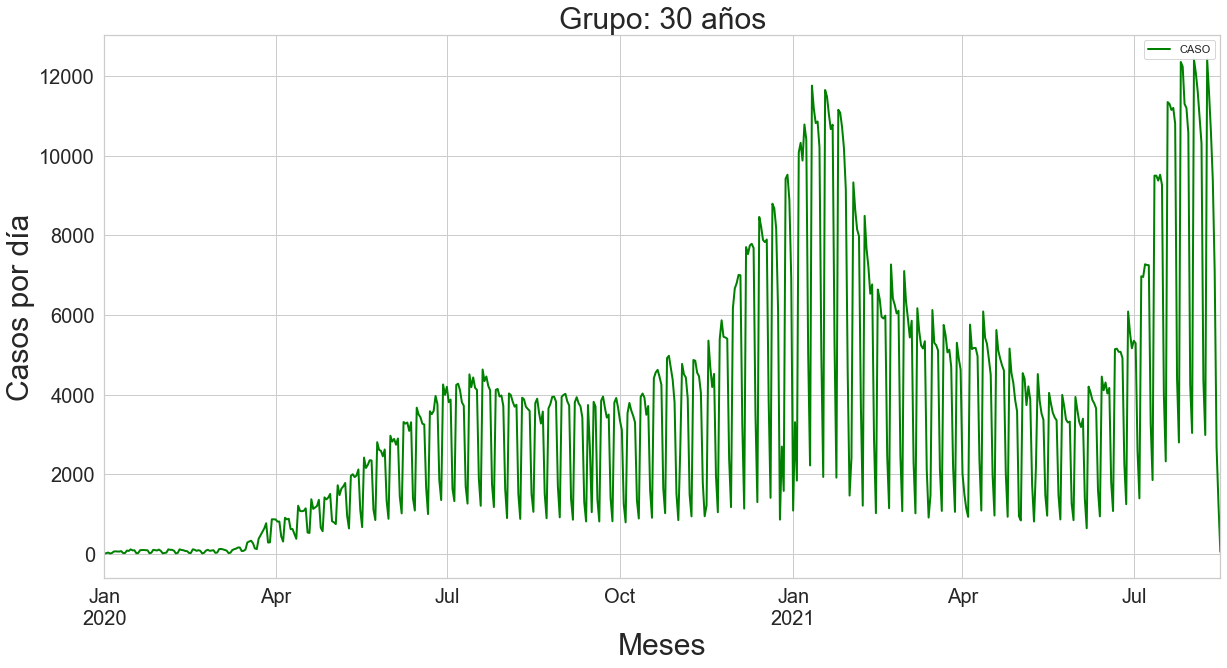

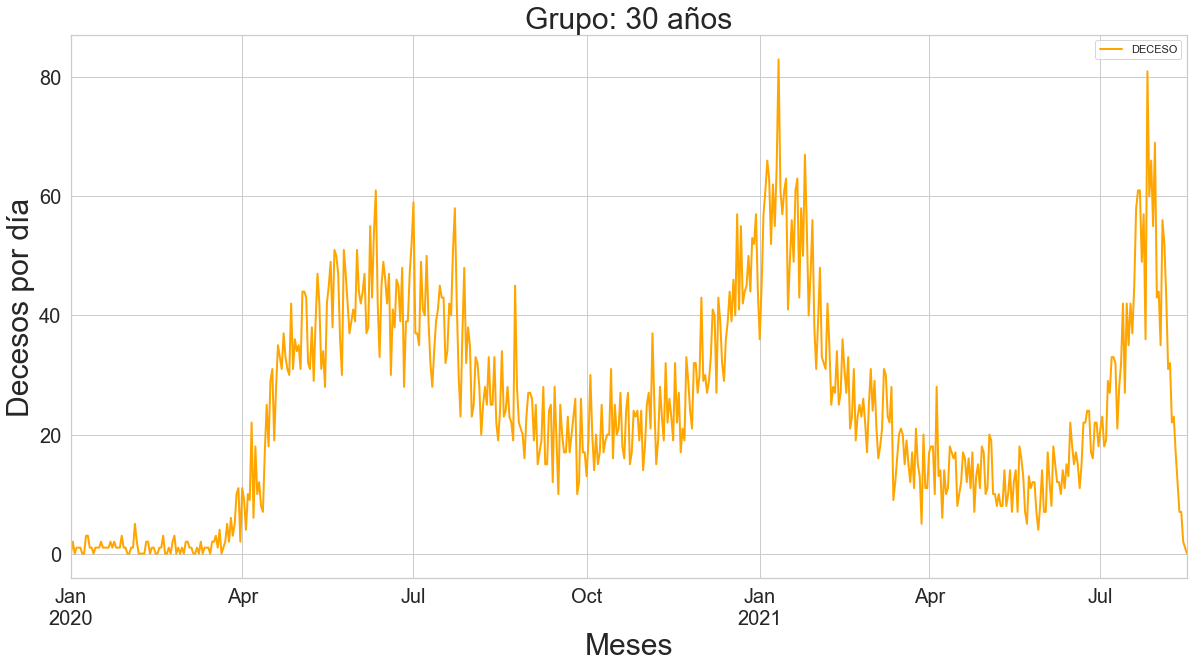

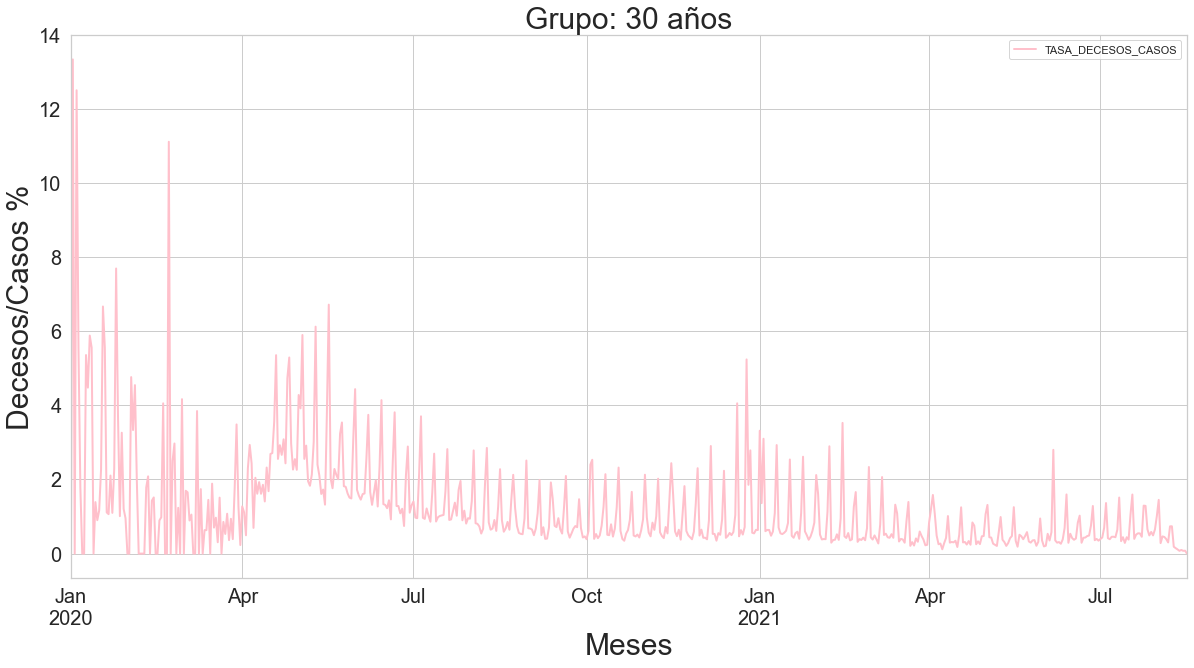

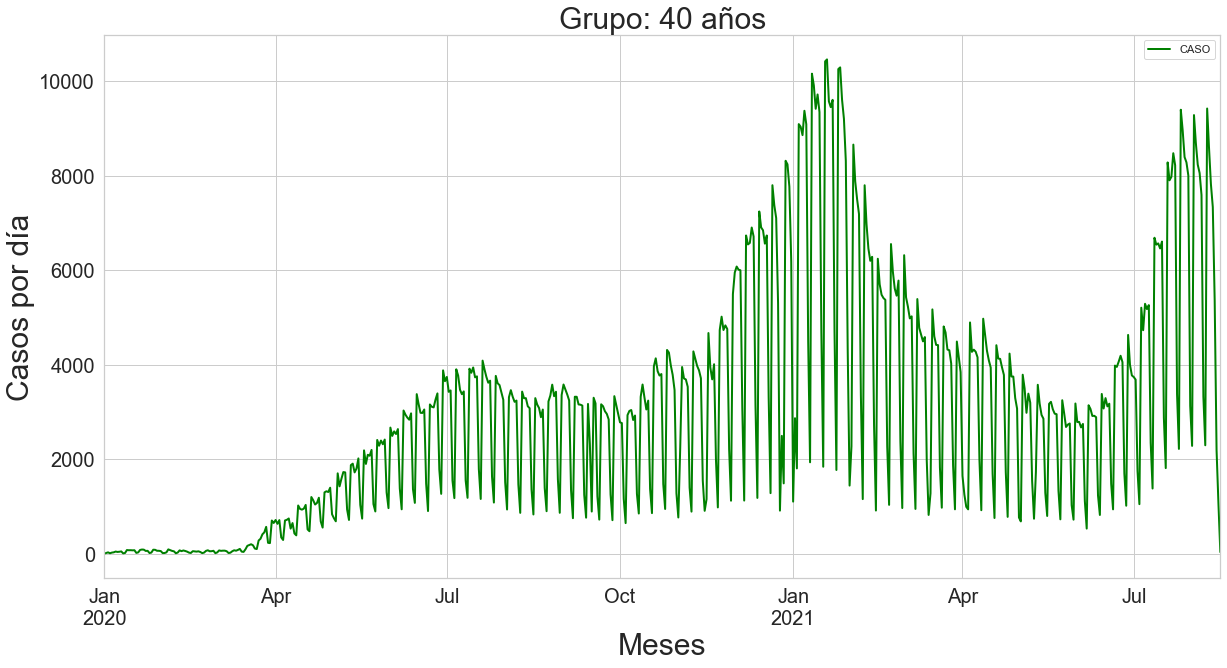

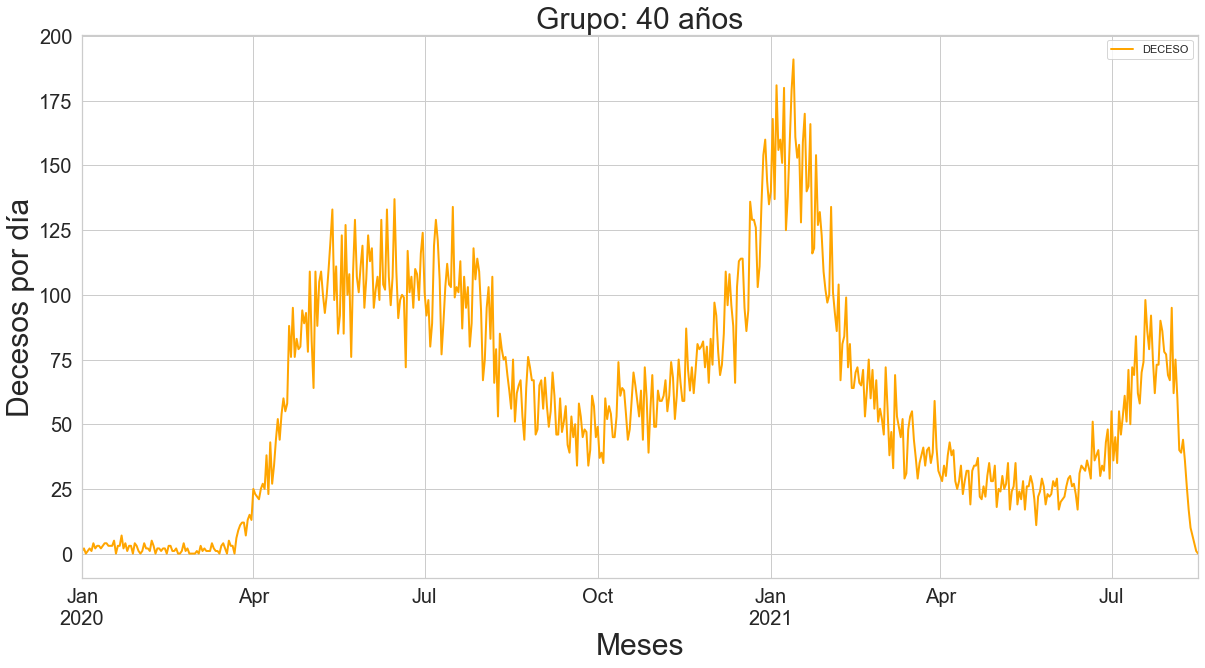

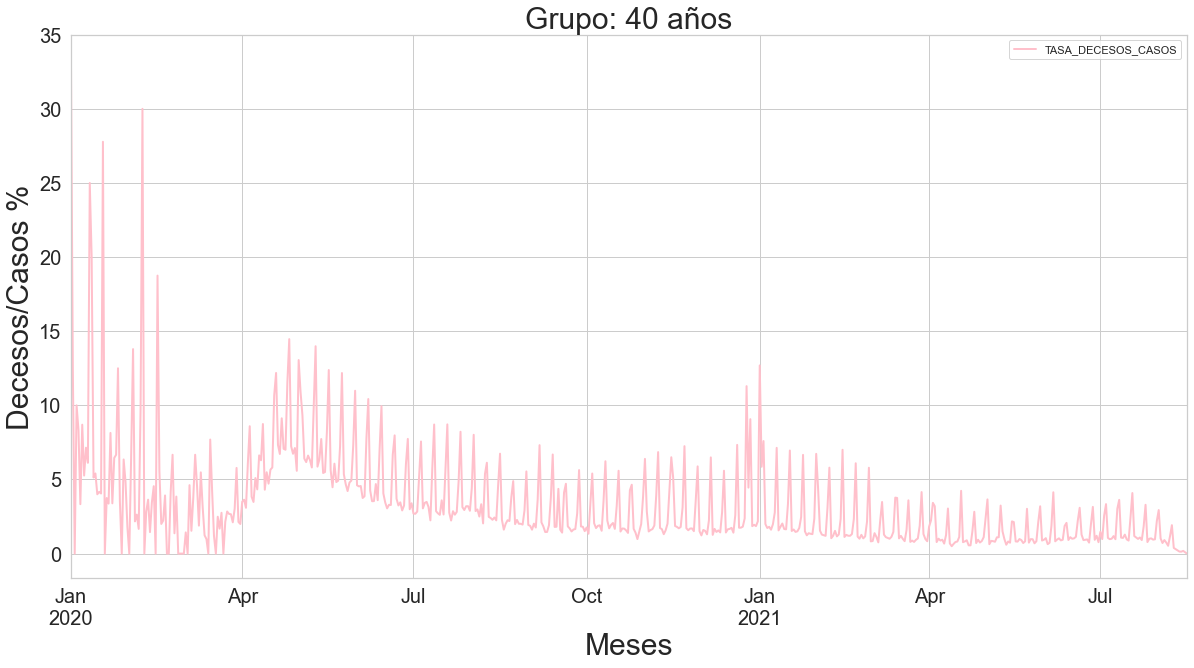

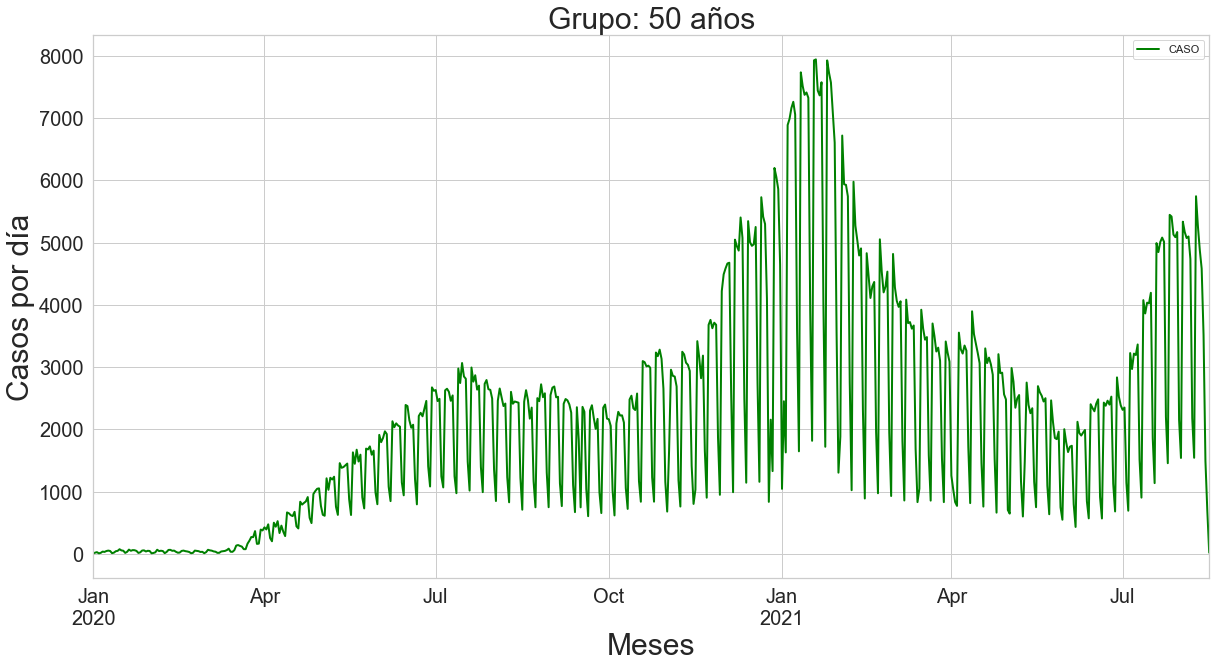

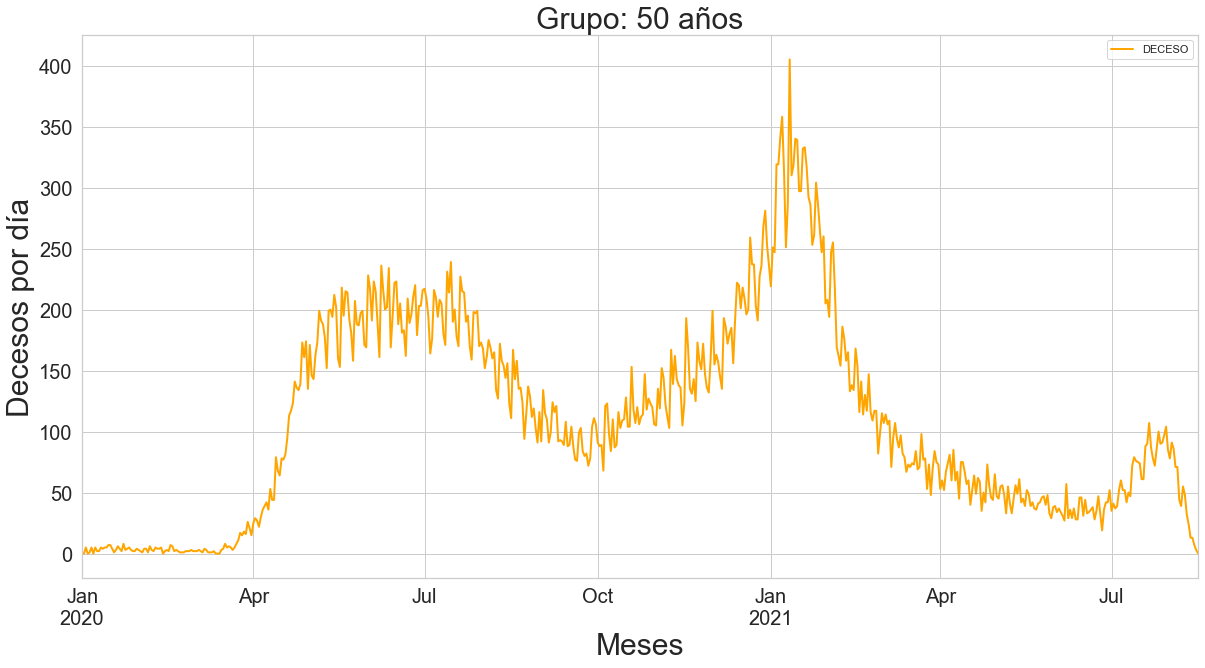

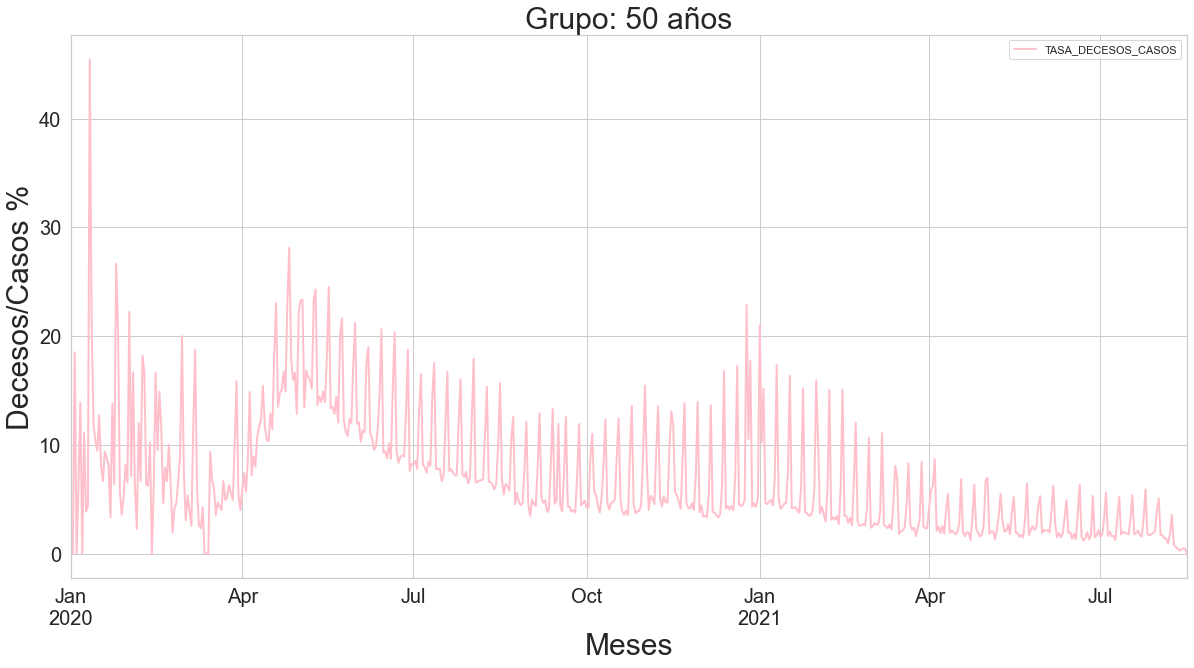

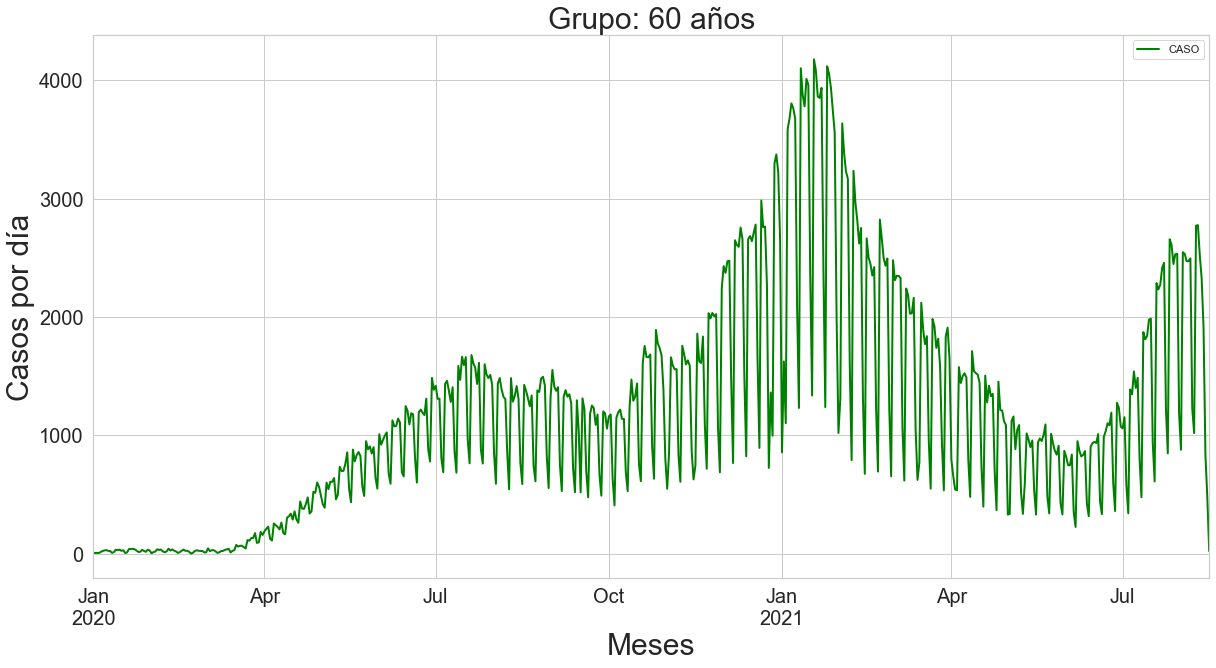

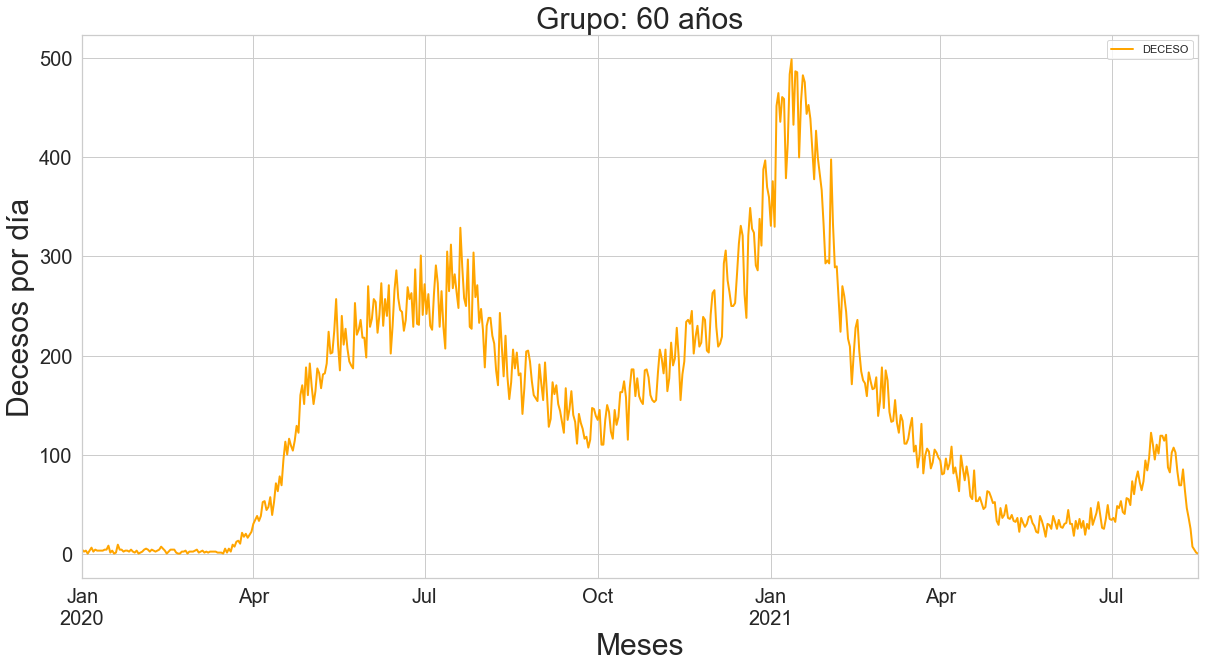

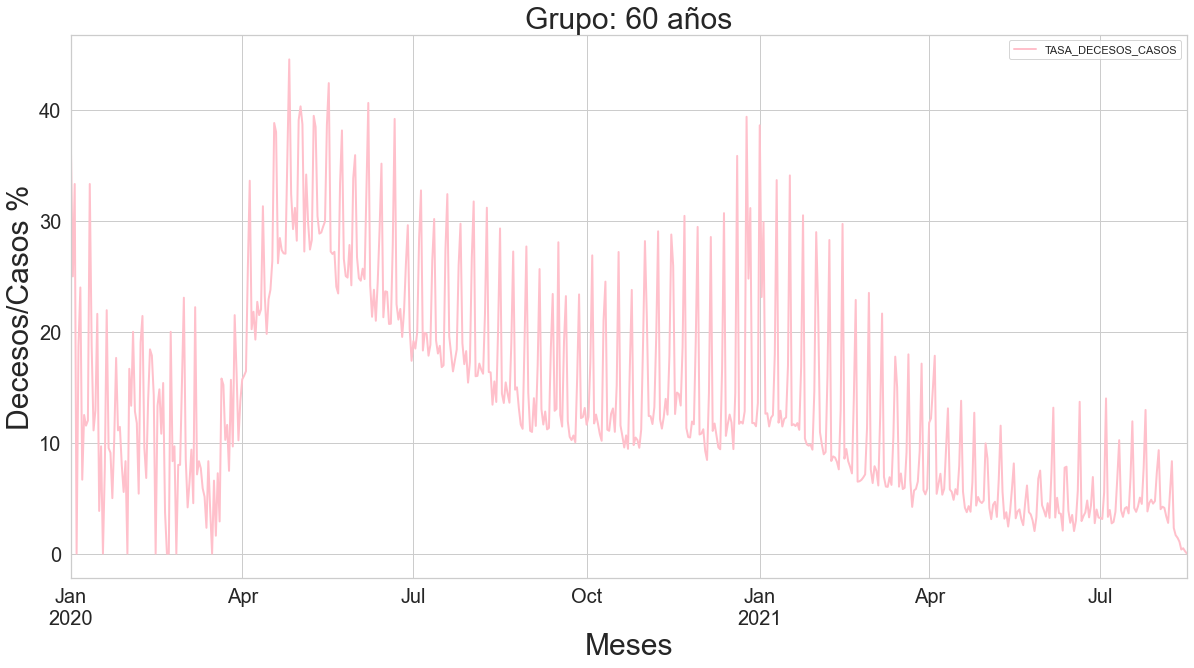

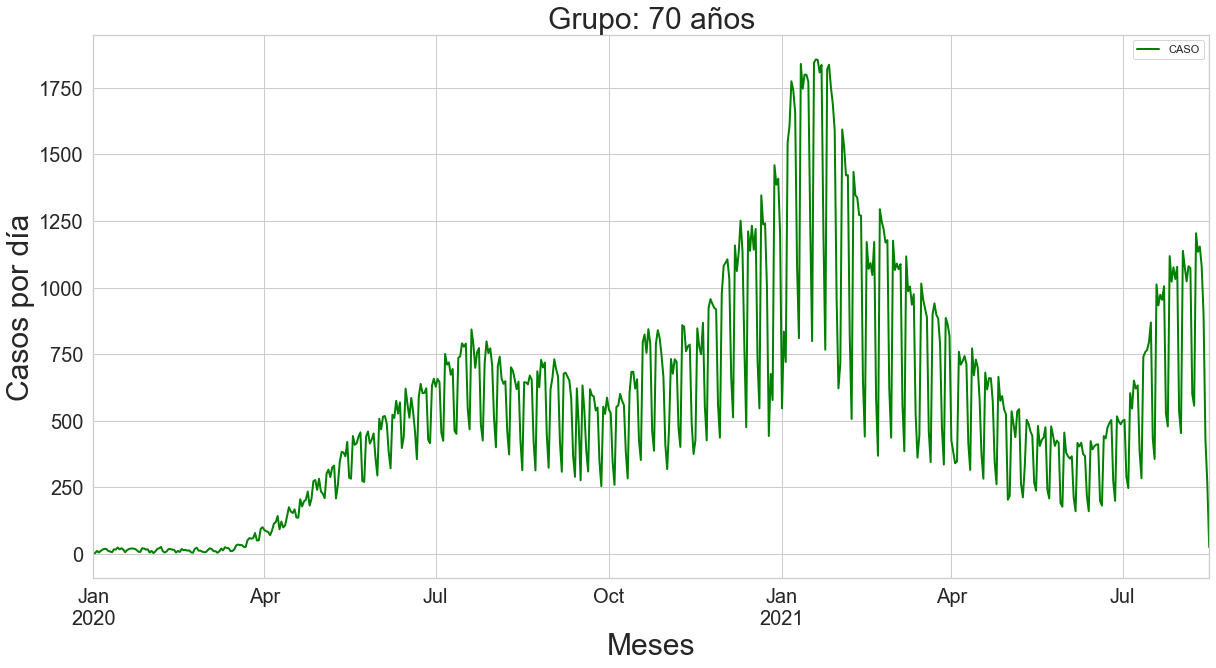

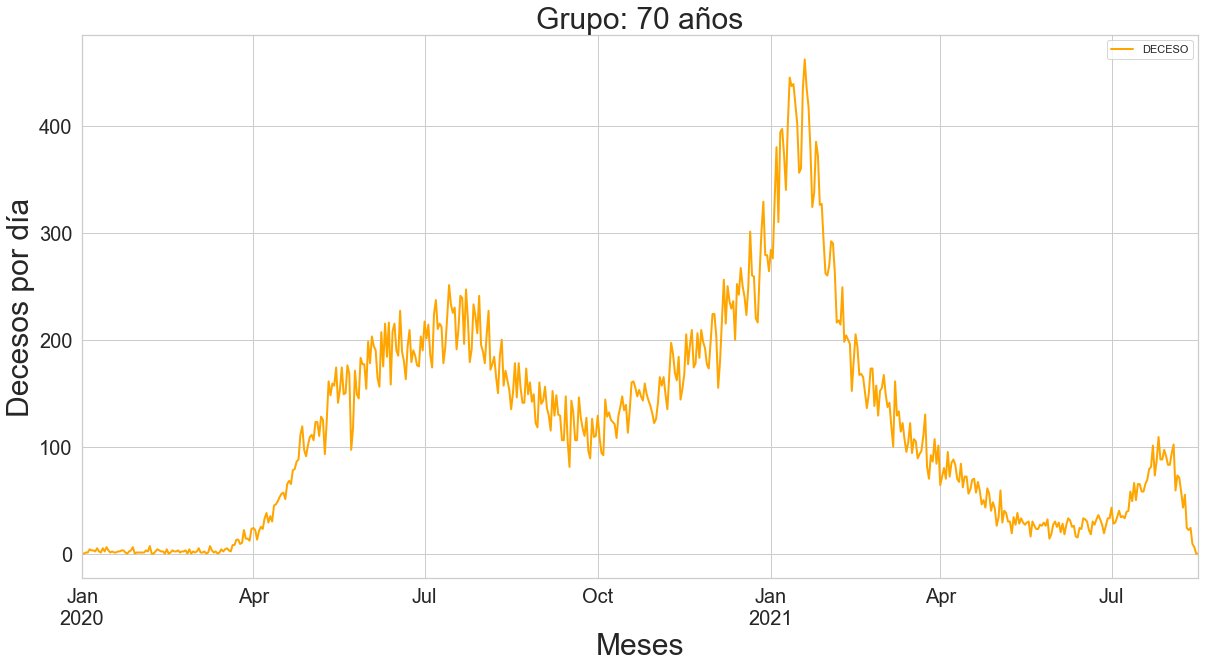

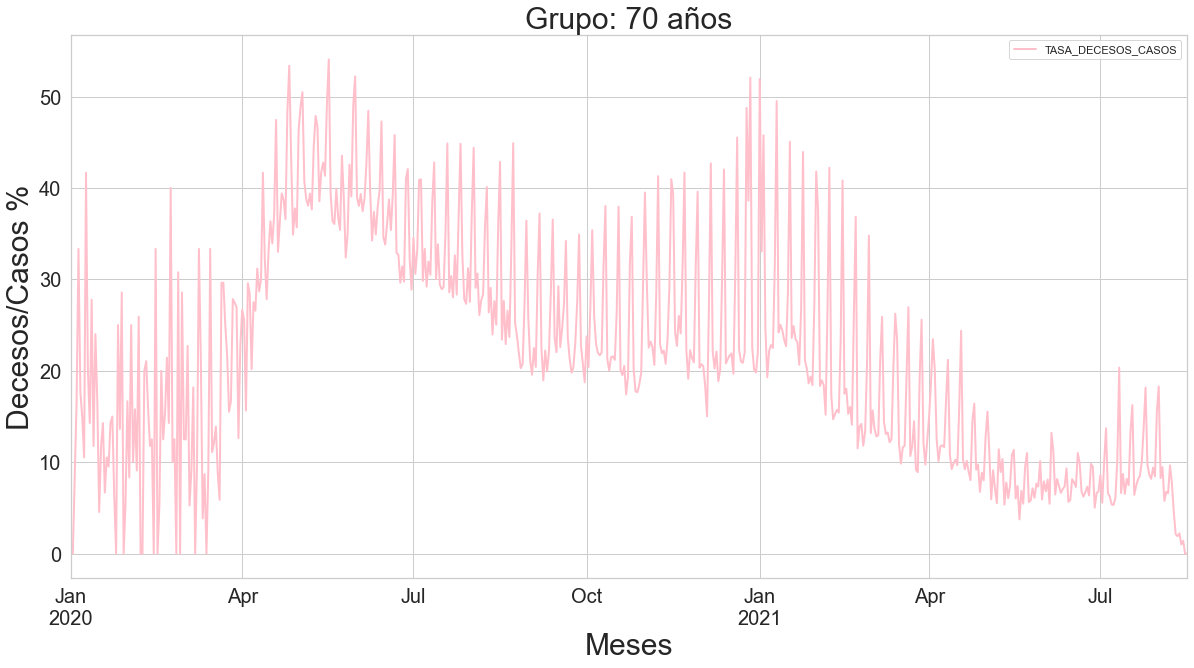

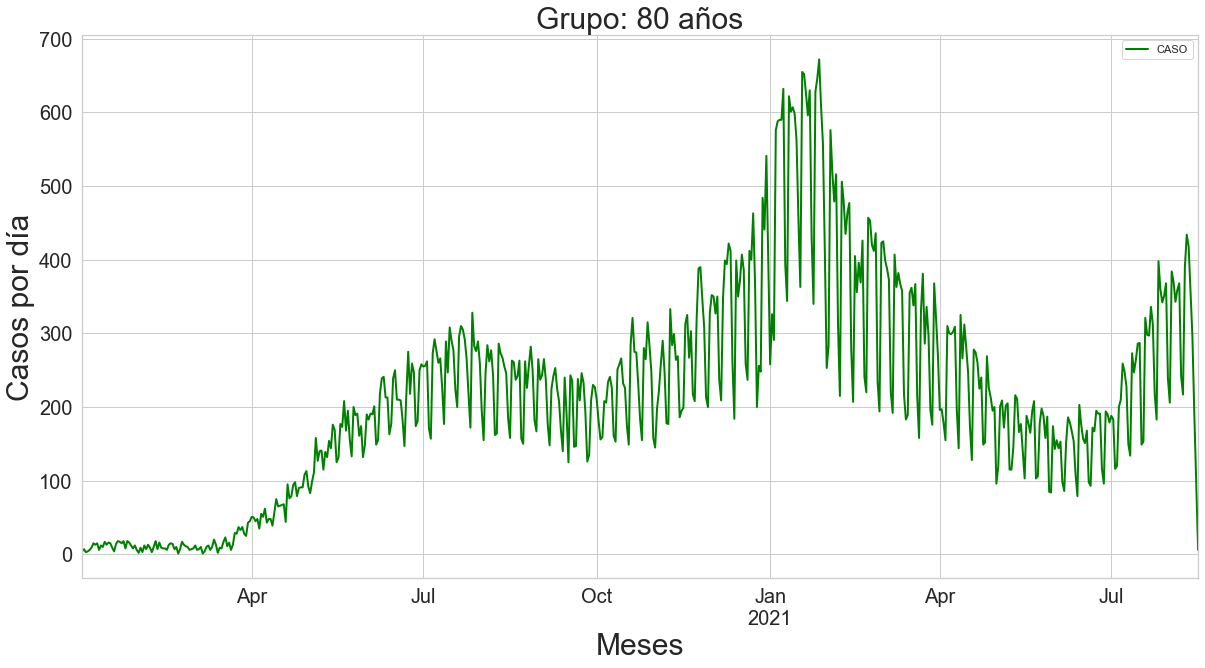

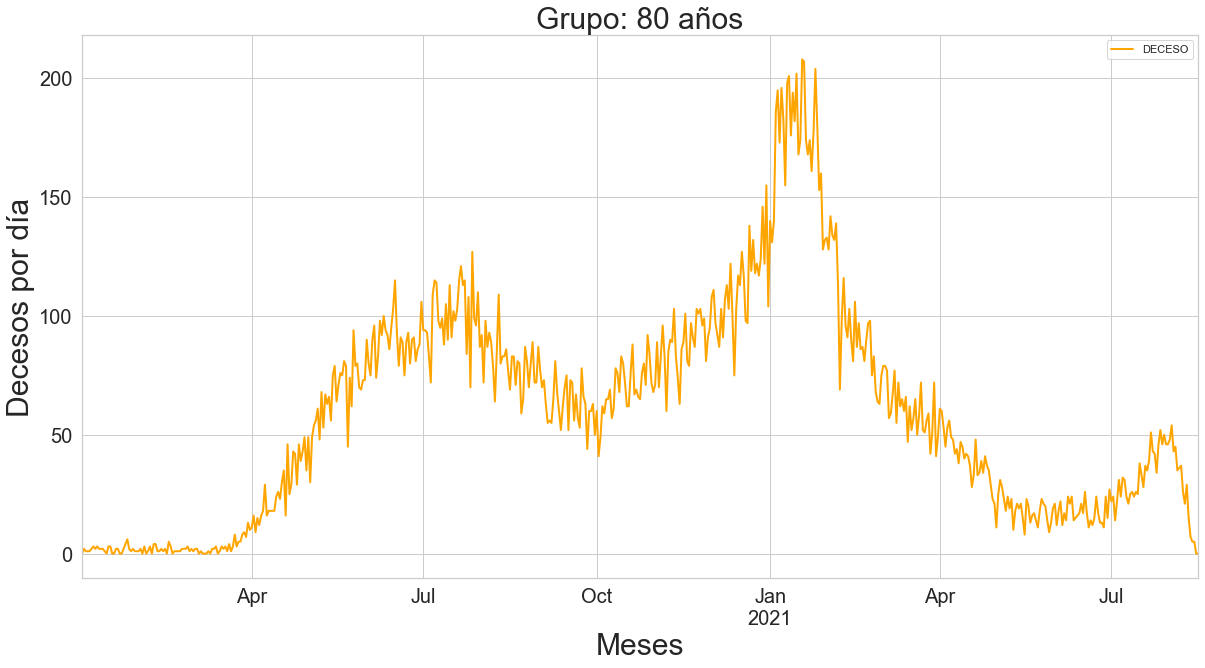

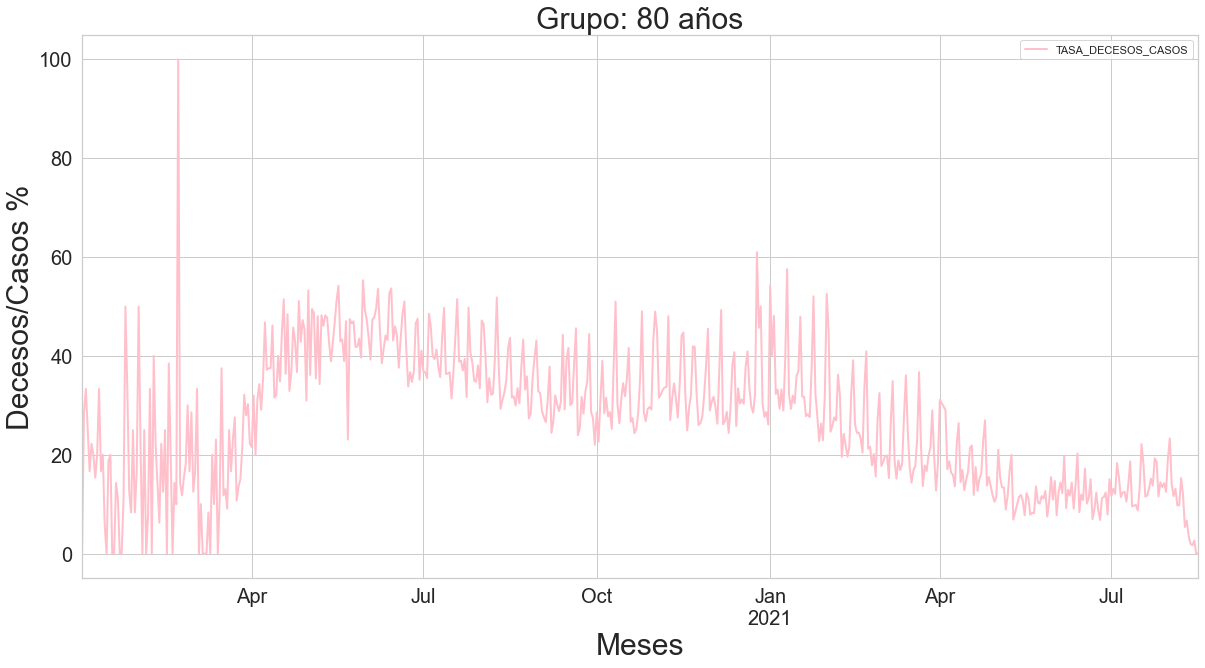

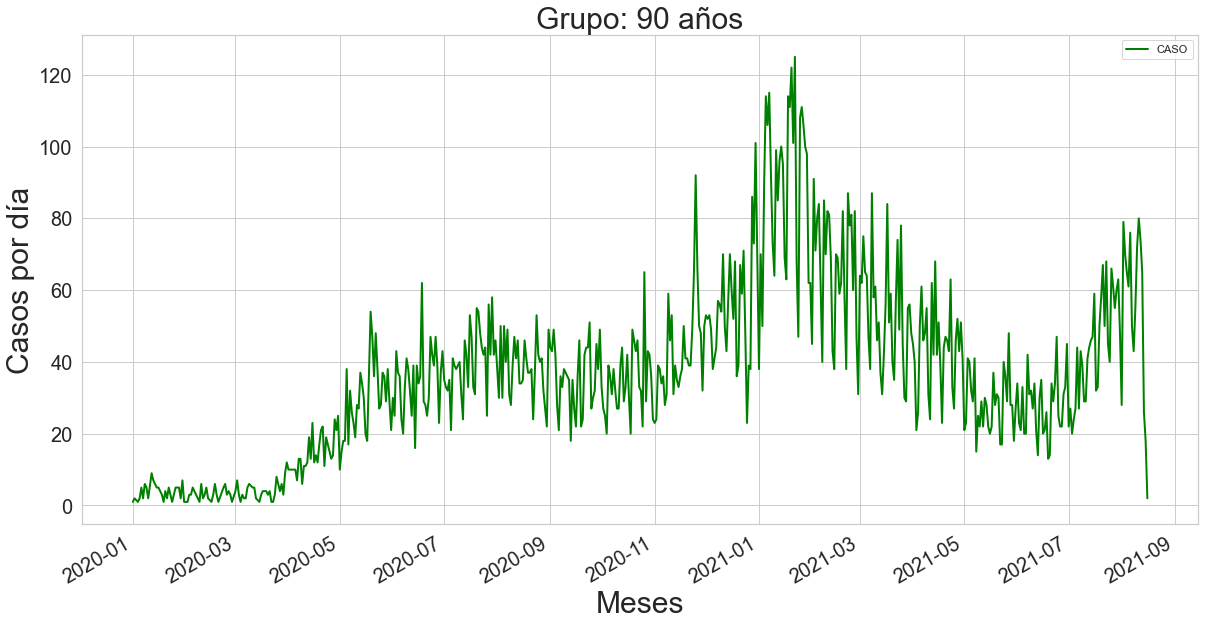

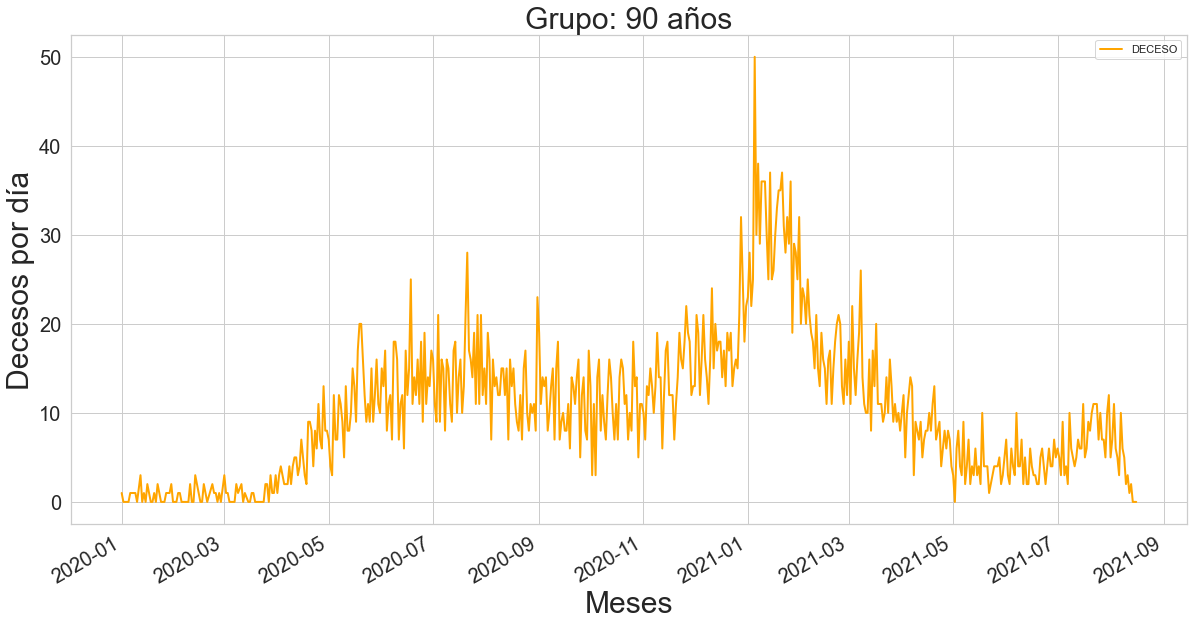

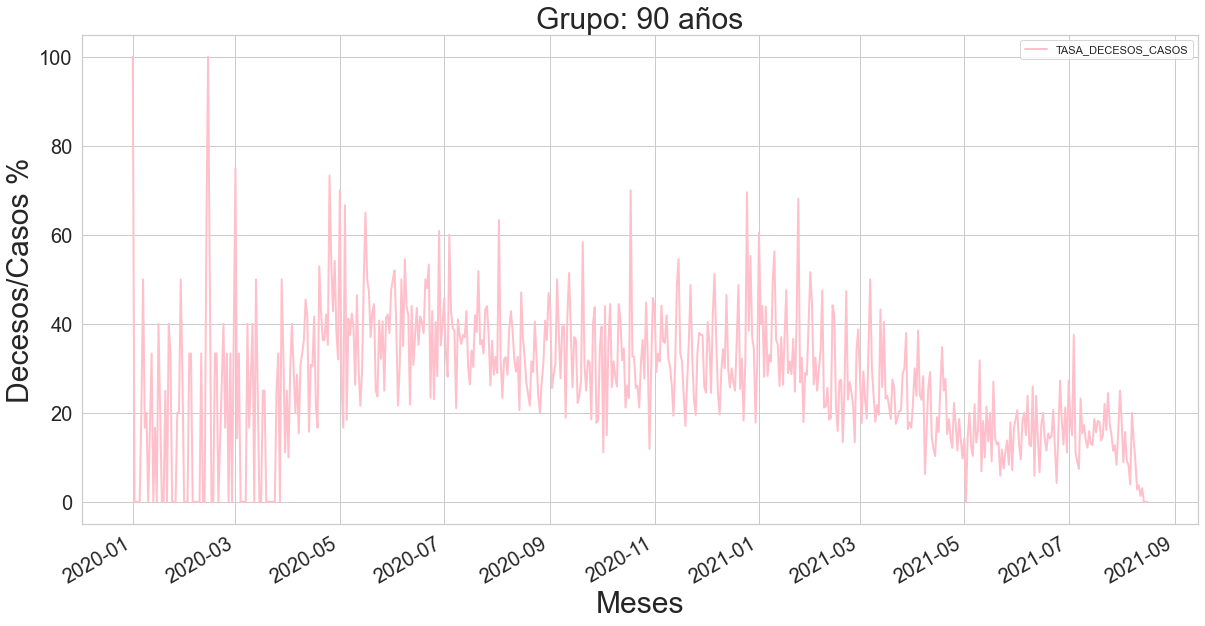

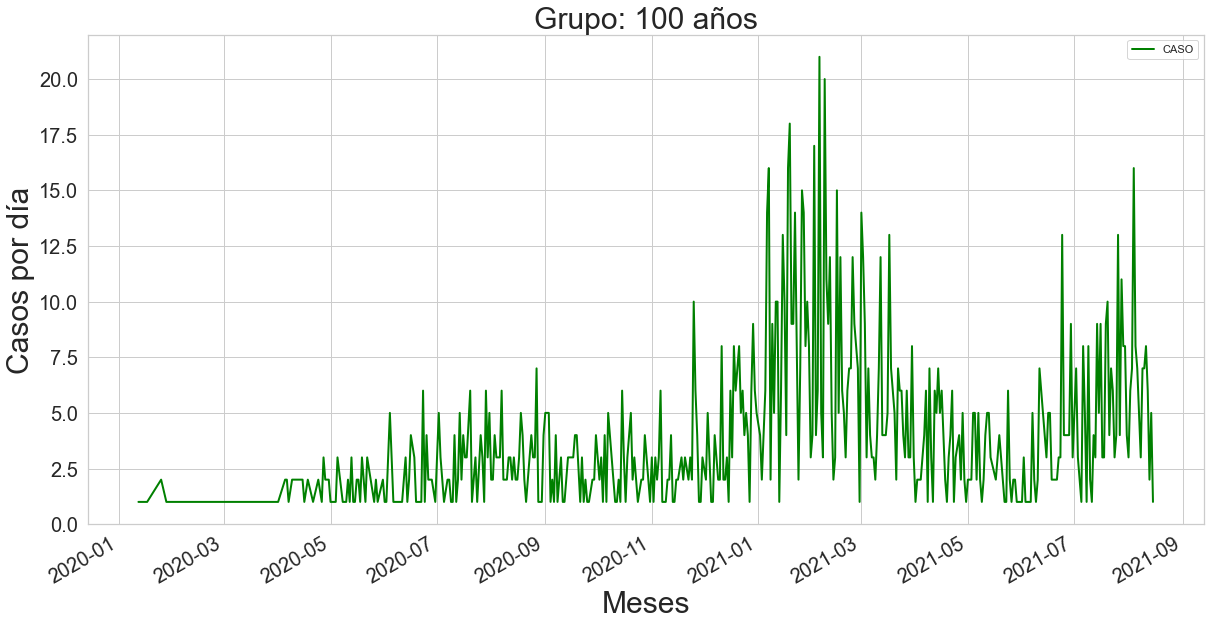

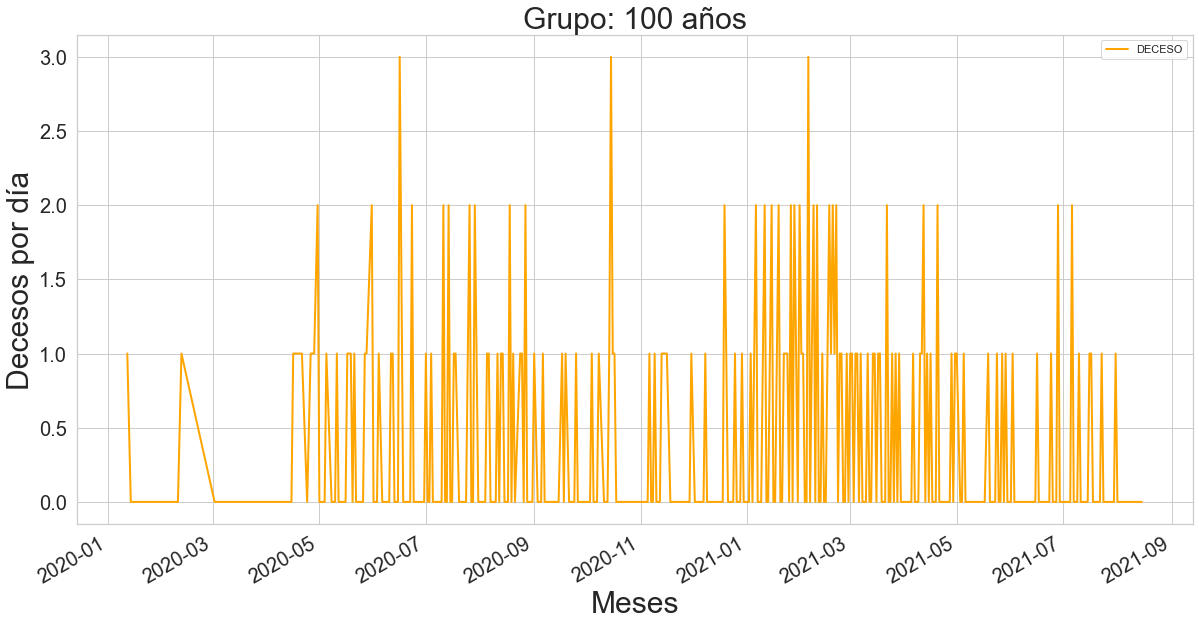

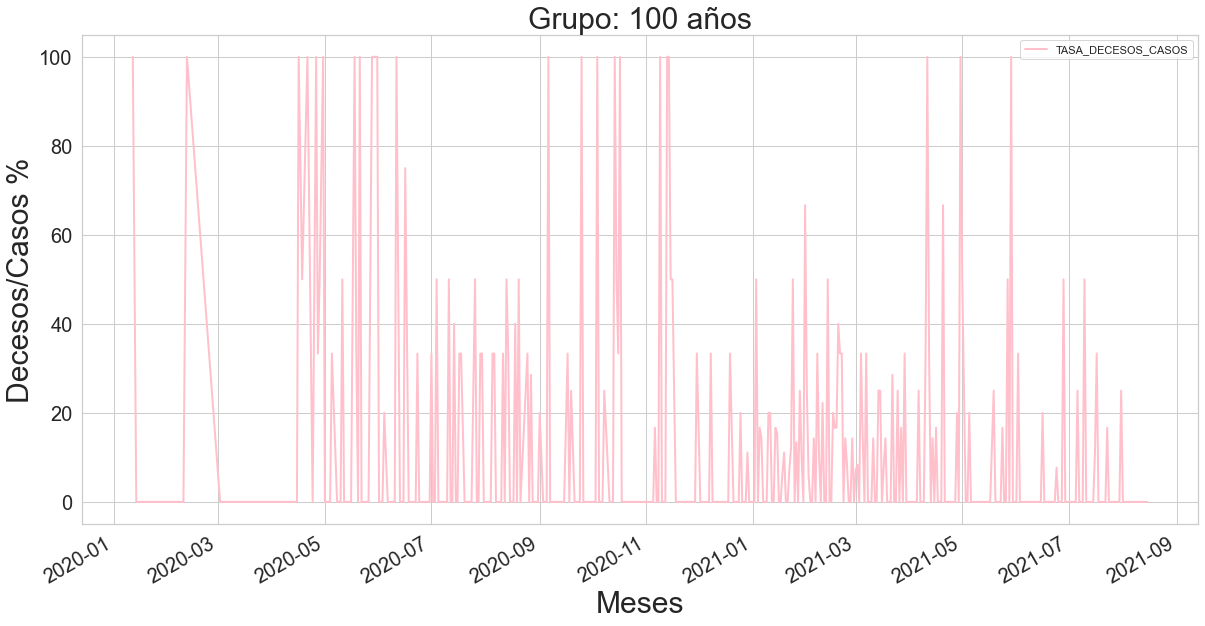

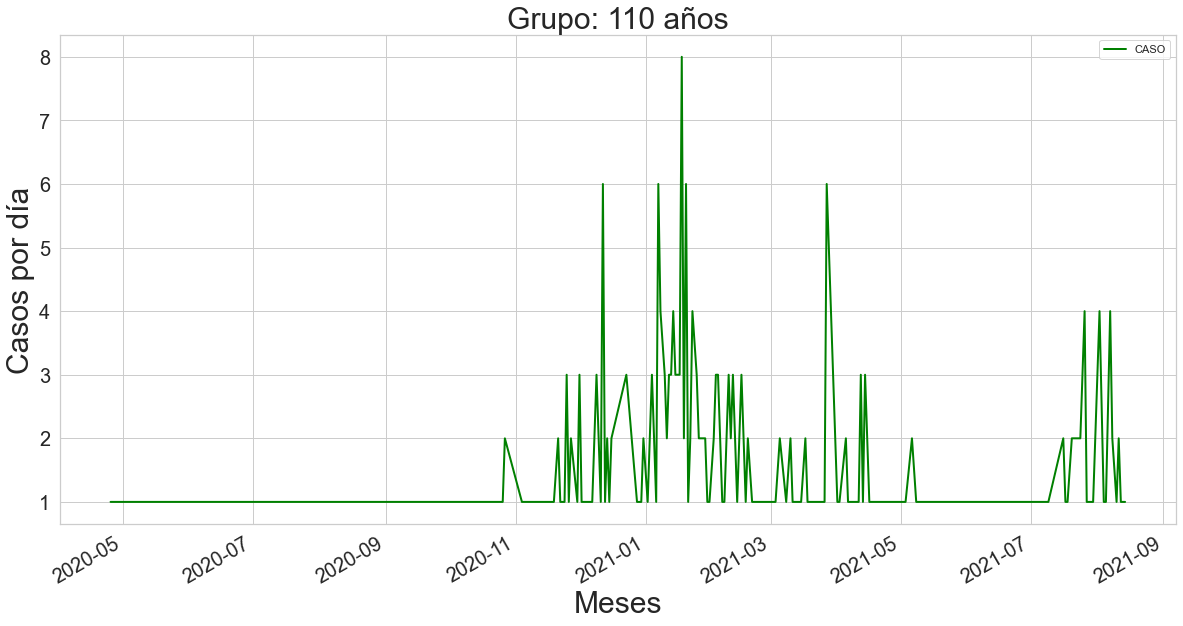

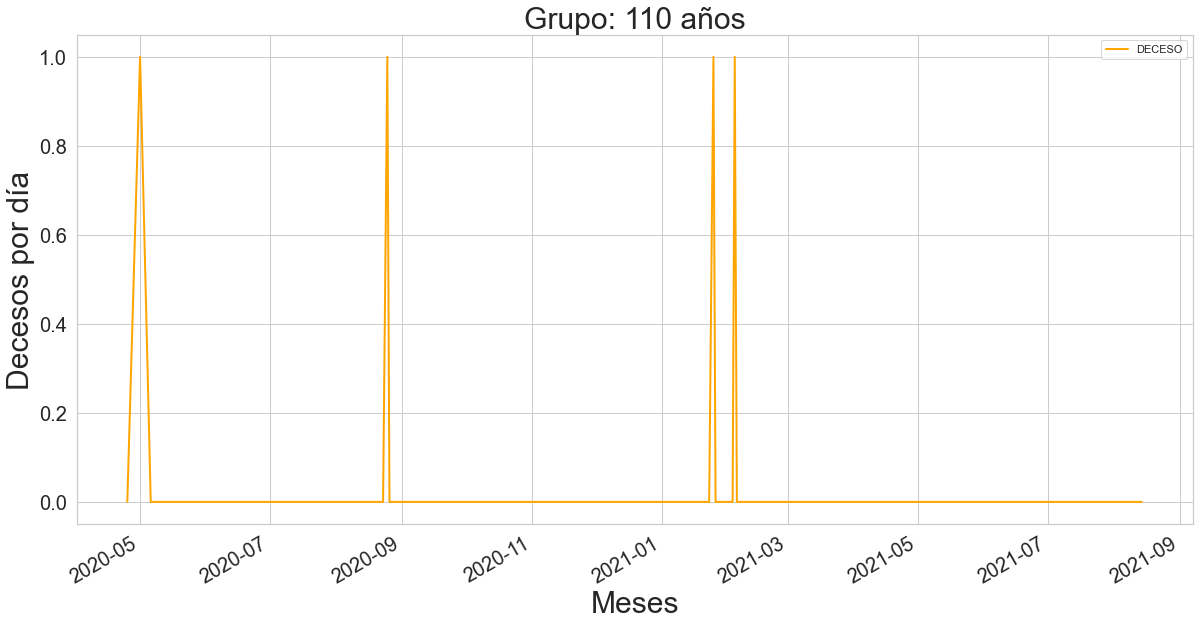

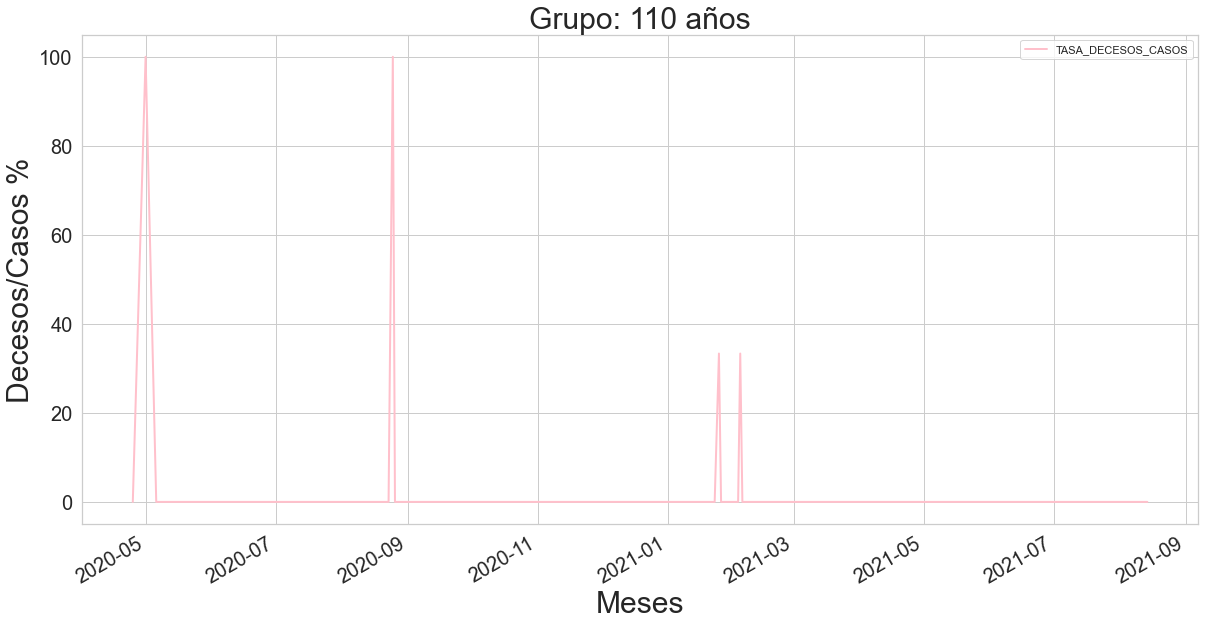

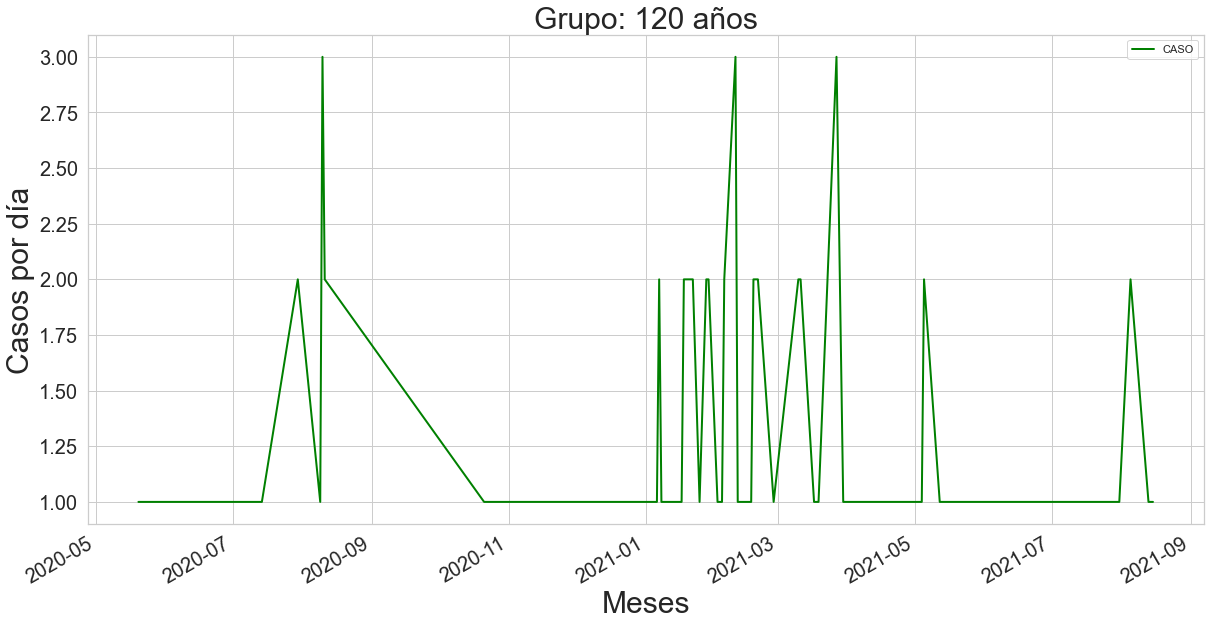

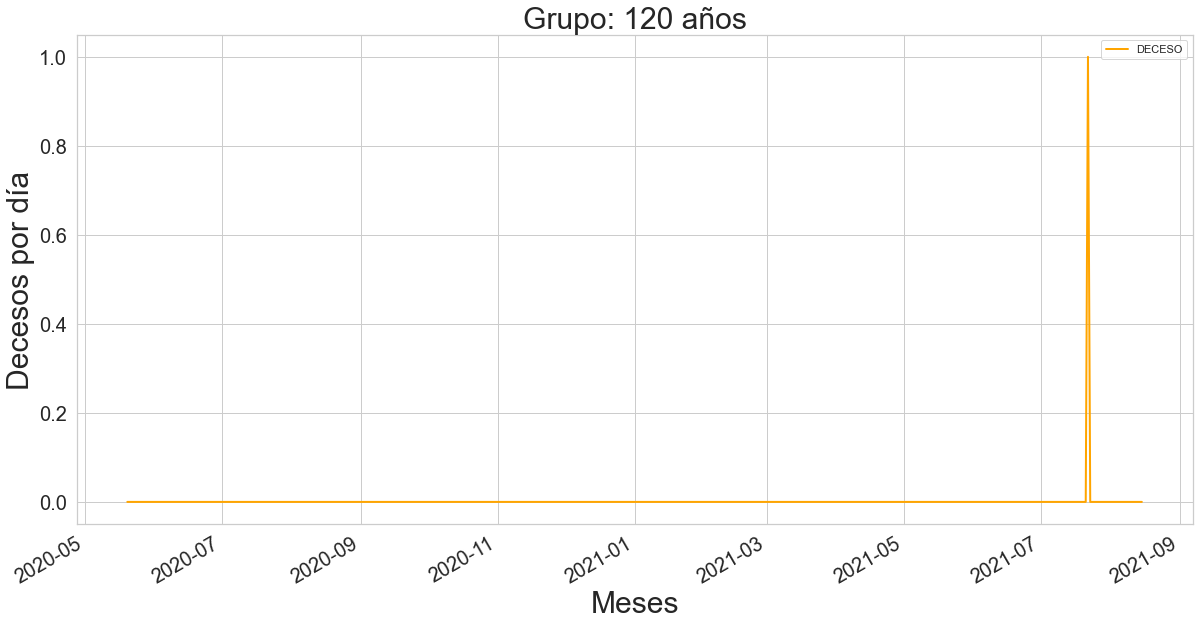

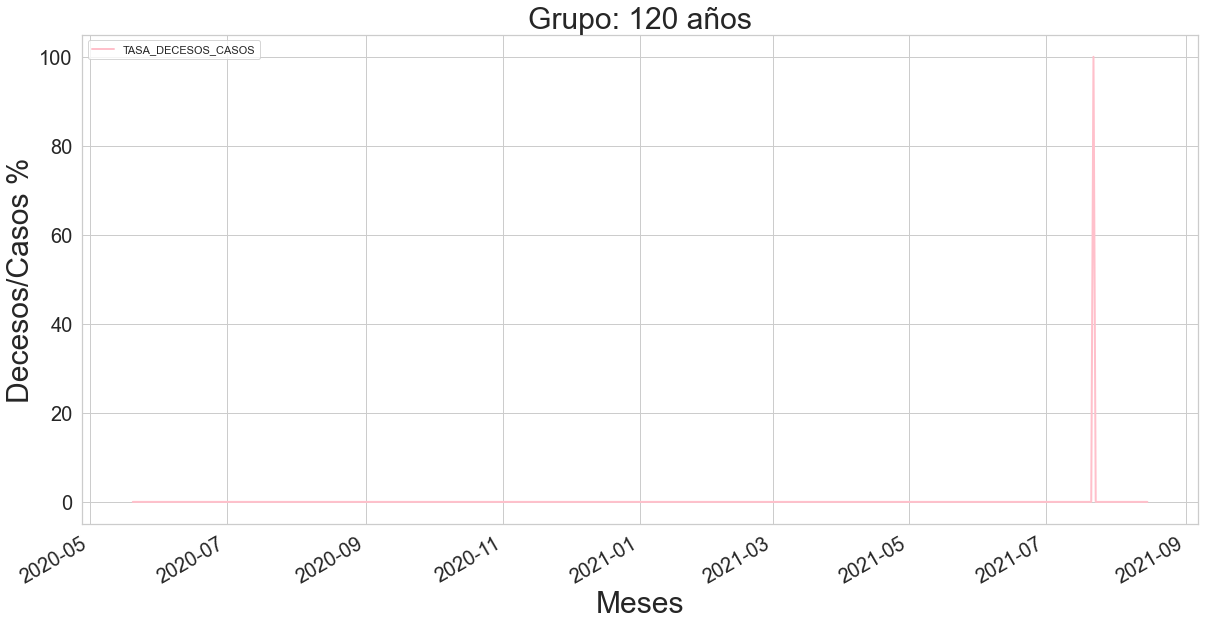

In [36]:
plt.close()
for group in final_covid19_df_tasa.groups:
    caso = final_covid19_df_tasa.get_group(group).plot(
        x='FECHA_INGRESO', 
        y='CASO', 
        title=f'Grupo: {group} años',
        legend=True, 
        figsize=(20,10), 
        color ="Green",
        linewidth = linewidth)
    caso.title.set_size(fontsize)
    caso.set_xlabel("Meses", fontsize = fontsize)
    caso.set_ylabel('Casos por día', fontsize = fontsize)
    plt.tick_params(axis = 'x', labelsize=labelsize)
    plt.tick_params(axis = 'y', labelsize=labelsize)
    
    deceso = final_covid19_df_tasa.get_group(group).plot(
        x='FECHA_INGRESO',
        y='DECESO', 
        title=f'Grupo: {group} años', 
        legend=True, 
        figsize=(20,10), 
        color = 'Orange',
        linewidth = linewidth)
    deceso.title.set_size(fontsize)
    deceso.set_xlabel("Meses", fontsize = fontsize)
    deceso.set_ylabel('Decesos por día', fontsize = fontsize)
    plt.tick_params(axis = 'x', labelsize=labelsize)
    plt.tick_params(axis = 'y', labelsize=labelsize)
    
    tasa = final_covid19_df_tasa.get_group(group).plot(
        x='FECHA_INGRESO', 
        y='TASA_DECESOS_CASOS',
        title=f'Grupo: {group} años', 
        legend=True, 
        figsize=(20,10), 
        color = 'Pink',
        linewidth = linewidth)
    tasa.title.set_size(fontsize)
    tasa.set_xlabel("Meses", fontsize = fontsize)
    tasa.set_ylabel('Decesos/Casos %', fontsize = fontsize)
    plt.tick_params(axis = 'x', labelsize=labelsize)
    plt.tick_params(axis = 'y', labelsize=labelsize)